In [ ]:
!pip install thop ptflops

In [ ]:
"""
DSADS Dataset Loader
Load data by person in dictionary format (no normal/abnormal split)
"""

import numpy as np
import os
from glob import glob
from collections import Counter
import pickle

# Activity mapping
activities = {
    'a01': 'sitting',
    'a02': 'standing',
    'a03': 'lying on back',
    'a04': 'lying on right side',
    'a05': 'ascending stairs',
    'a06': 'descending stairs',
    'a07': 'standing in an elevator still',
    'a08': 'moving around in an elevator',
    'a09': 'walking in a parking lot',
    'a10': 'walking on a treadmill with a speed of 4 kmh',
    'a11': 'walking in flat and 15 deg inclined positions',
    'a12': 'running on a treadmill with a speed of 8 kmh',
    'a13': 'exercising on a stepper',
    'a14': 'exercising on a cross trainer',
    'a15': 'cycling on an exercise bike in horizontal positions',
    'a16': 'cycling on an exercise bike in vertical positions',
    'a17': 'rowing',
    'a18': 'jumping',
    'a19': 'playing basketball'
}


def load_dsads_by_person(data_path, save_path=None):
    """
    Load DSADS dataset organized by person

    Parameters:
    -----------
    data_path : str
        Path to DSADS data folder (containing a01, a02, ... a19 folders)
    save_path : str, optional
        Path to save pickle files

    Returns:
    --------
    all_data : dict
        Dictionary with person as key, data array as value
    all_label : dict
        Dictionary with person as key, label array as value
    """

    # Get persons and classes
    persons = ['p' + str(i) for i in range(1, 9)]
    classes = sorted([os.path.split(f)[1] for f in glob(os.path.join(data_path, 'a*'))])

    print(f"{'='*60}")
    print("DSADS Dataset Loading")
    print(f"{'='*60}")
    print(f"Found {len(classes)} activity classes: {classes}")
    print(f"Found {len(persons)} persons: {persons}")
    print(f"{'='*60}\n")

    all_data = {}
    all_label = {}

    for p in persons:
        print(f"Loading {p}...")
        data = []
        label = []

        for c in classes:
            print(f"loading {c}...")
            # Get all files for this person and class
            pattern = os.path.join(data_path, c, p, '*')
            f_lst = glob(pattern)

            if not f_lst:
                print(f"⚠️  No files found for {c}/{p}")
                continue

            seqs = []
            for f in f_lst:
                try:
                    seq = np.loadtxt(f, delimiter=',')
                    seqs.append(seq)
                except Exception as e:
                    print(f"Error loading {f}: {e}")

            seqs = np.array(seqs)
            data.extend(seqs)
            label.extend([c] * len(seqs))

        data = np.array(data)
        label = np.array(label)

        all_data[p] = data
        all_label[p] = label

        print(f"{p} {data.shape} {Counter(label)}")

    # Save to pickle if path provided
    if save_path:
        os.makedirs(save_path, exist_ok=True)

        data_file = os.path.join(save_path, 'all_data.pkl')
        label_file = os.path.join(save_path, 'all_label.pkl')

        with open(data_file, 'wb') as f:
            pickle.dump(all_data, f)

        with open(label_file, 'wb') as f:
            pickle.dump(all_label, f)

        print(f"\n{'='*60}")
        print(f"✓ Saved to:")
        print(f"  - {data_file}")
        print(f"  - {label_file}")
        print(f"{'='*60}\n")

    return all_data, all_label


def print_summary(all_data, all_label):
    """
    Print summary statistics
    """
    print(f"\n{'='*60}")
    print("SUMMARY")
    print(f"{'='*60}")

    total_samples = sum(len(data) for data in all_data.values())
    print(f"Total samples across all persons: {total_samples}")

    if len(all_data) > 0:
        first_person = list(all_data.keys())[0]
        sample_shape = all_data[first_person].shape
        print(f"Data shape per person: {sample_shape}")
        print(f"  - Samples: {sample_shape[0]}")
        print(f"  - Timesteps: {sample_shape[1]}")
        print(f"  - Features: {sample_shape[2]}")

    print(f"\n{'='*60}")
    print("SAMPLES PER PERSON")
    print(f"{'='*60}")
    print(f"{'Person':<10} {'Samples':<10} {'Activities':<15}")
    print(f"{'-'*40}")

    for person in sorted(all_data.keys()):
        n_samples = len(all_data[person])
        n_activities = len(np.unique(all_label[person]))
        print(f"{person:<10} {n_samples:<10} {n_activities:<15}")

    print(f"{'='*60}\n")


def main():
    """
    Main function
    """
    # Set your paths
    data_path = '/content/drive/MyDrive/HAR_Dataset/DSADS'
    save_path = './'

    print("="*60)
    print("DSADS Dataset Loader (By Person)")
    print("="*60)
    print(f"Data path: {data_path}")
    print(f"Save path: {save_path}")
    print("="*60 + "\n")

    if not os.path.exists(data_path):
        print(f"❌ Data path not found: {data_path}")
        print("Please update the data_path variable.")
        return

    # Load data
    all_data, all_label = load_dsads_by_person(data_path, save_path)

    # Print summary
    print_summary(all_data, all_label)

    print("\n💡 To load the data later:")
    print("="*60)
    print("import pickle")
    print(f"all_data = pickle.load(open('{os.path.join(save_path, 'all_data.pkl')}', 'rb'))")
    print(f"all_label = pickle.load(open('{os.path.join(save_path, 'all_label.pkl')}', 'rb'))")
    print("="*60)


if __name__ == "__main__":
    main()

DSADS Dataset Loader (By Person)
Data path: /content/drive/MyDrive/HAR_Dataset/DSADS
Save path: ./

DSADS Dataset Loading
Found 19 activity classes: ['a01', 'a02', 'a03', 'a04', 'a05', 'a06', 'a07', 'a08', 'a09', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19']
Found 8 persons: ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']

Loading p1...
loading a01...
loading a02...
loading a03...
loading a04...
loading a05...
loading a06...
loading a07...
loading a08...
loading a09...
loading a10...
loading a11...
loading a12...
loading a13...
loading a14...
loading a15...
loading a16...
loading a17...
loading a18...
loading a19...
p1 (1140, 125, 45) Counter({np.str_('a01'): 60, np.str_('a02'): 60, np.str_('a03'): 60, np.str_('a04'): 60, np.str_('a05'): 60, np.str_('a06'): 60, np.str_('a07'): 60, np.str_('a08'): 60, np.str_('a09'): 60, np.str_('a10'): 60, np.str_('a11'): 60, np.str_('a12'): 60, np.str_('a13'): 60, np.str_('a14'): 60, np.str_('a15'): 60, np.str_('a16'): 60, np.

Device: cuda

LOADING DSADS DATASET
Loading DSADS data with window=25, stride=12
Data shape: (82170, 45, 25)
Labels: ['sitting', 'standing', 'lying on back', 'lying on right side', 'ascending stairs', 'descending stairs', 'standing in an elevator still', 'moving around in an elevator', 'walking in a parking lot', 'walking on a treadmill with a speed of 4 kmh', 'walking in flat and 15 deg inclined positions', 'running on a treadmill with a speed of 8 kmh', 'exercising on a stepper', 'exercising on a cross trainer', 'cycling on an exercise bike in horizontal positions', 'cycling on an exercise bike in vertical positions', 'rowing', 'jumping', 'playing basketball']
Total subjects: 8

Train subjects: 5 users (IDs: [1 2 3 4 5])
Val subjects: 1 users (IDs: [6])
Test subjects: 2 users (IDs: [7 8])

Train samples: 51390
Val samples: 10260
Test samples: 20520

STARTING FULL EXPERIMENT RUN FOR: K-TRAIN = 1-SHOT

BUILDING UNCERTAINTY-AWARE PROTOTYPE NETWORK

MODEL ARCHITECTURE & PERFORMANCE STATS

,Metric,Value
0,Parameters (M),0.40
1,FLOPs (M),1.39
2,Inference Time (ms),13.17



META-TRAINING (K=1, 2000 Episodes)

Episode    0 | Loss: 3.6304 | Train Acc: 0.3067 | Val Acc: 0.0525
10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 
Episode  200 | Loss: 0.3808 | Train Acc: 0.8741 | Val Acc: 0.6926
210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 
Episode  400 | Loss: 0.3827 | Train Acc: 0.8704 | Val Acc: 0.7789
410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 
Episode  600 | Loss: 0.3657 | Train Acc: 0.8706 | Val Acc: 0.7853
610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 
Episode  800 | Loss: 0.3351 | Train Acc: 0.9294 | Val Acc: 0.7735
810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 
Episode 1000 | Loss: 0.3540 | Train Acc: 0.8706 | Val Acc: 0.7967
1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 
Episode 1200 | Loss: 0.3312 | Train Acc: 0.9128 | Val Acc: 0.8047
121

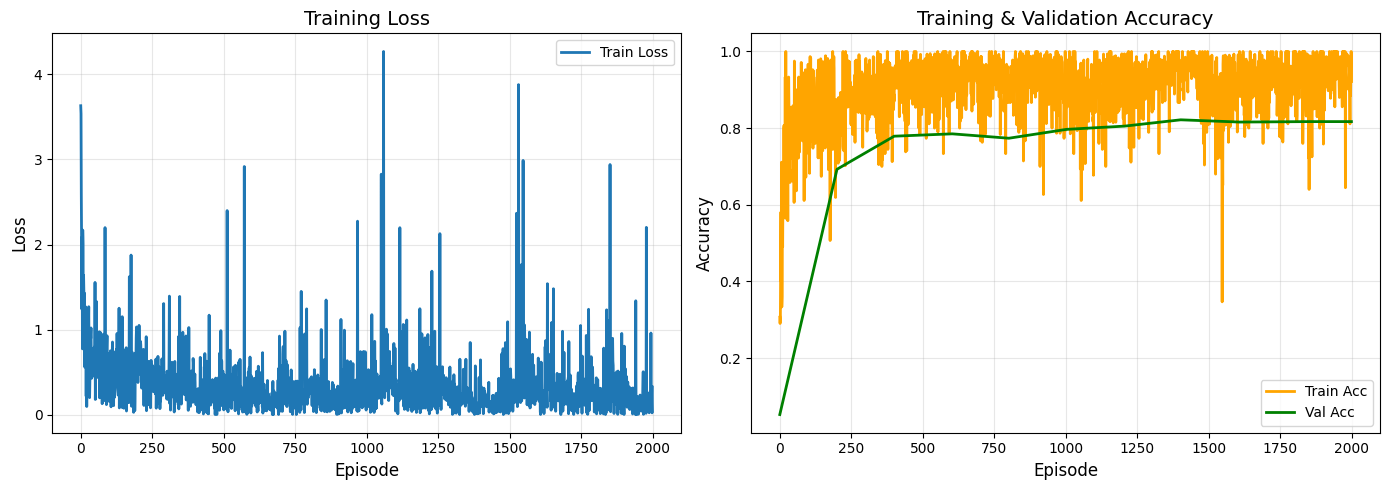

Displayed: learning_curves_k1.png

META-TESTING: 19-WAY, 1-SHOT PERFORMANCE (CROSS-DOMAIN)

OVERALL RESULTS (LSSO SPLIT):


,Metric,Value
0,Accuracy,0.8394
1,F1-Score (macro),0.8393
2,Precision (macro),0.8394
3,Recall (macro),0.8394



PER-CLASS ACCURACY (LSSO SPLIT):


,Class,Accuracy
0,sitting,0.8357
1,standing,0.8587
2,lying on back,0.8553
3,lying on right side,0.8420
4,ascending stairs,0.8617
5,descending stairs,0.8180
6,standing in an elevator still,0.8517
7,moving around in an elevator,0.8330
8,walking in a parking lot,0.8093
9,walking on a treadmill with a speed of 4 kmh,0.8307


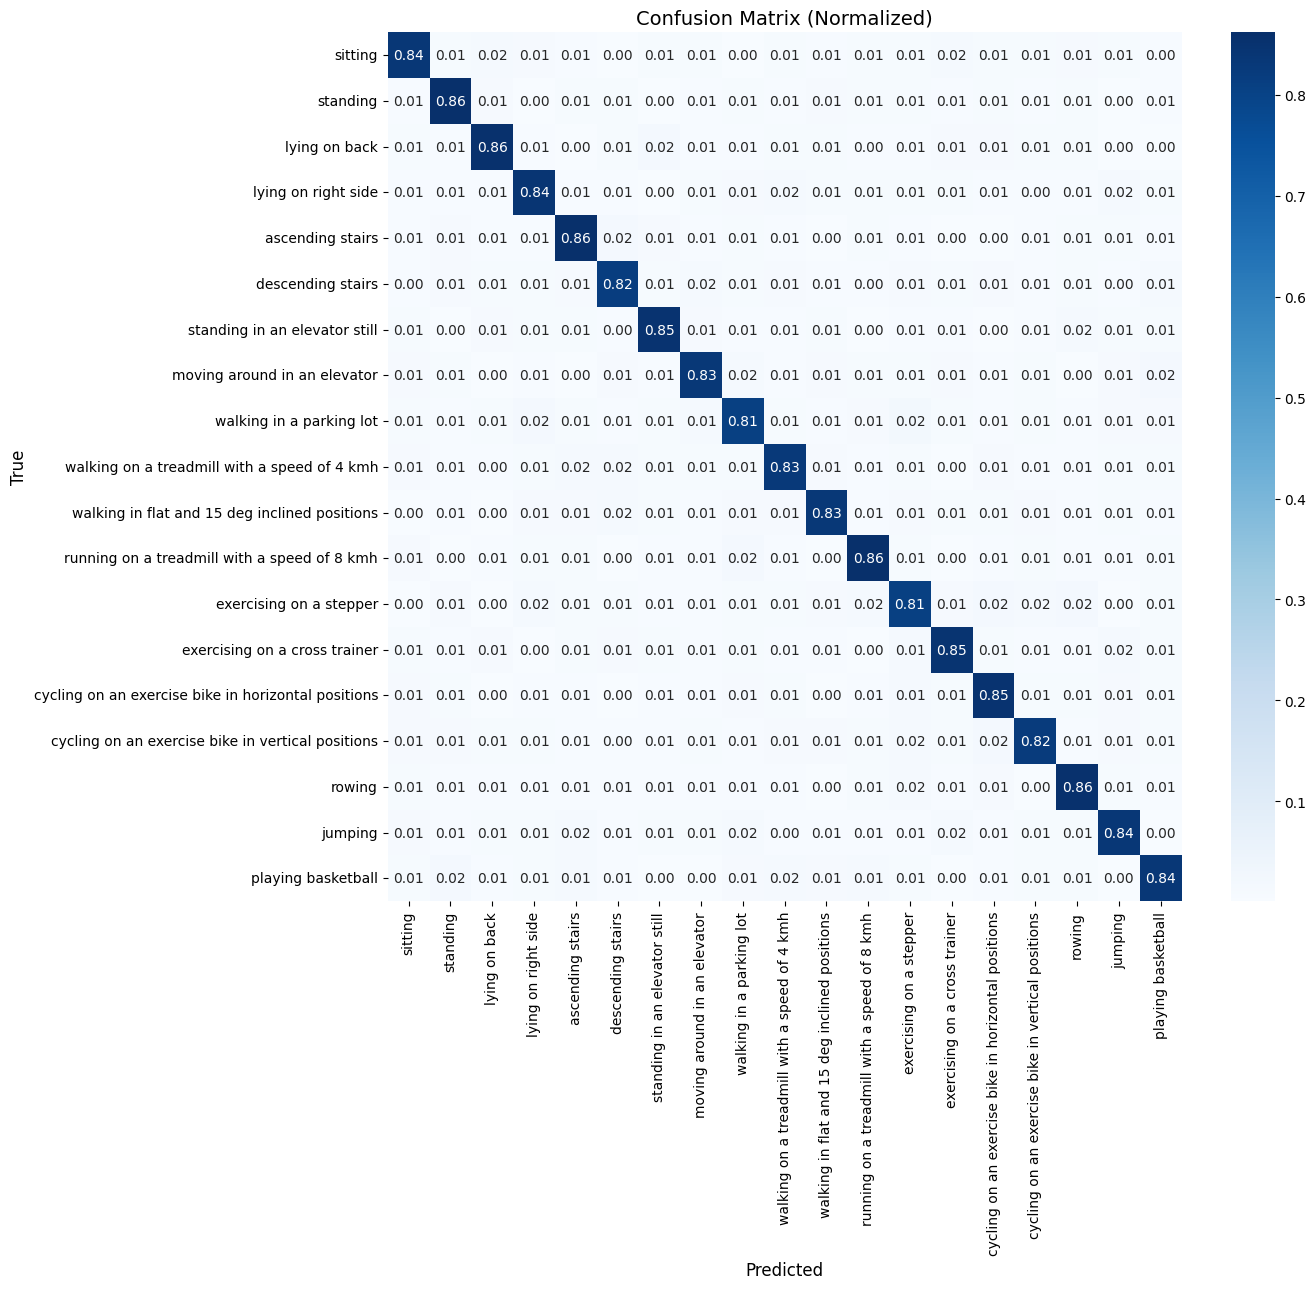


Displayed: cm_k1.png

K-SHOT ABLATION STUDY
Testing 1-shot...
Testing 3-shot...
Testing 5-shot...
Testing 10-shot...
Testing 20-shot...

K-SHOT COMPARISON:


,K-Shot,Accuracy,F1,Precision,Recall
0,1,0.8376,0.8376,0.8381,0.8376
1,3,0.8849,0.8849,0.8851,0.8849
2,5,0.8918,0.8917,0.8918,0.8918
3,10,0.8954,0.8953,0.8954,0.8954
4,20,0.9083,0.9083,0.9084,0.9083


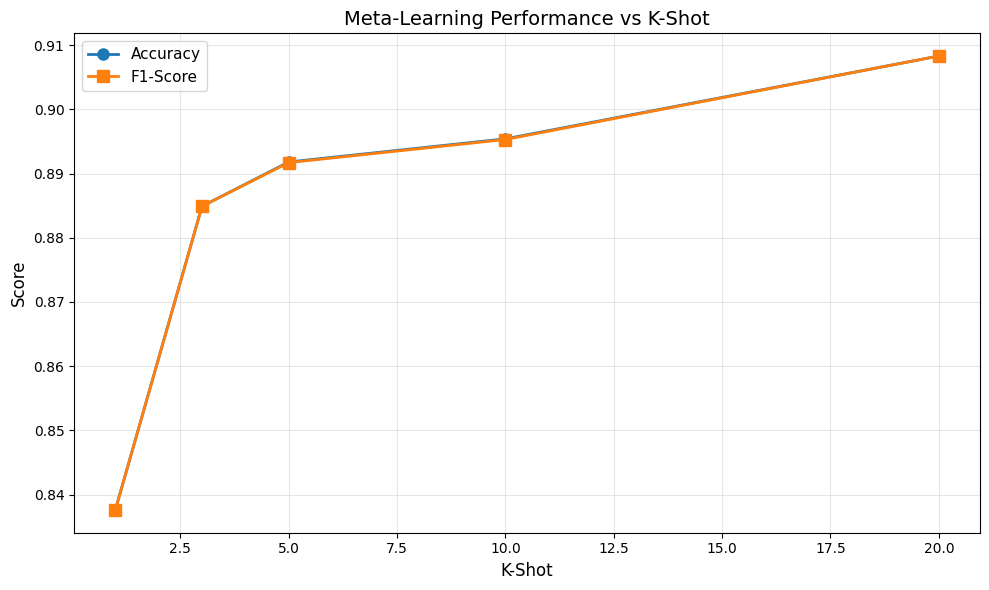


Displayed: kshot_comparison_k1.png

N-WAY ABLATION STUDY (K=1)
Testing 5-way...
Testing 10-way...
Testing 15-way...
Testing 19-way...

N-WAY COMPARISON:


,N-Way,Accuracy,F1,Precision,Recall
0,5,0.9309,0.9308,0.9313,0.9309
1,10,0.8940,0.8940,0.8945,0.8940
2,15,0.8482,0.8481,0.8487,0.8482
3,19,0.8430,0.8431,0.8433,0.8430



QUERY SET SIZE ABLATION (K=1)
Testing query=5...
Testing query=10...
Testing query=15...
Testing query=20...
Testing query=25...

QUERY SIZE COMPARISON:


,Query Size (q),Accuracy,F1,Precision,Recall
0,5,0.8336,0.8334,0.8338,0.8336
1,10,0.8417,0.8416,0.8419,0.8417
2,15,0.8338,0.8337,0.8340,0.8338
3,20,0.8388,0.8386,0.8387,0.8388
4,25,0.8395,0.8395,0.8399,0.8395



PER-USER PERSONALIZATION (ON TEST SET, K=1)


,User,Accuracy,F1,Precision,Recall
0,7,0.8474,0.8473,0.8487,0.8474
1,8,0.8267,0.8262,0.8275,0.8267



Mean User Accuracy (Test Set): 0.8371 ± 0.0104


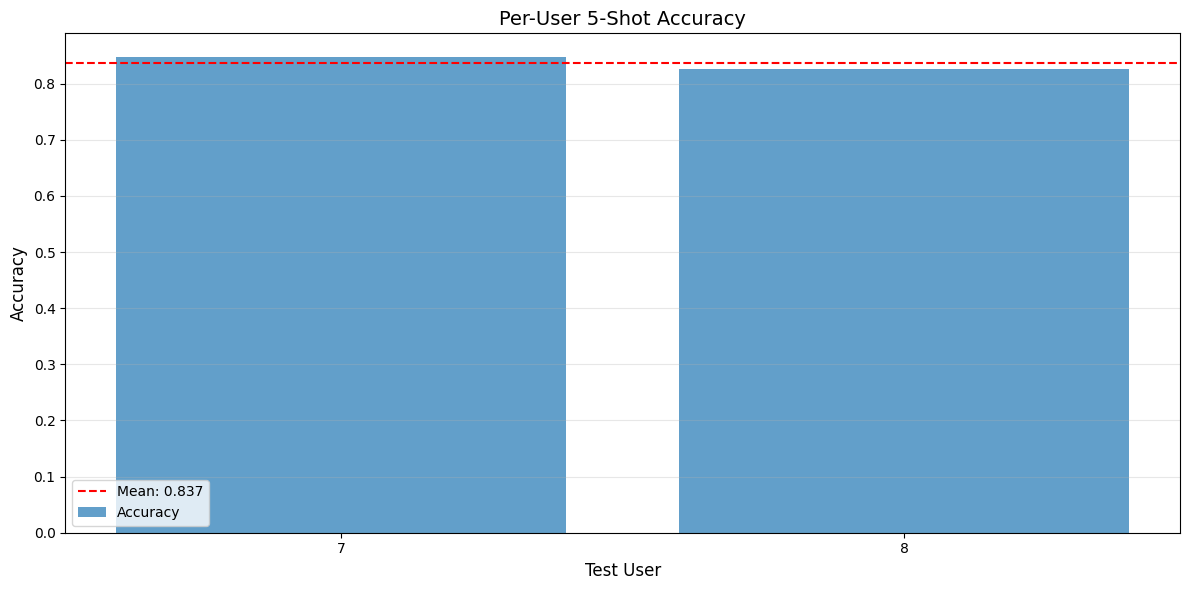

Displayed: user_performance_k1.png

FEATURE CALIBRATION / VARIANCE ANALYSIS


,Intra-Class Variance (L2),Inter-Class Variance (L2),Separation Ratio (Inter/Intra)
0,1.4446,5.1381,3.5567



ROBUSTNESS TEST (NOISY QUERY, K=1)
... Testing Robustness: Type=jitter, Level=0.1
    -> Acc: 0.8316, F1: 0.8315
... Testing Robustness: Type=jitter, Level=0.2
    -> Acc: 0.8362, F1: 0.8362
... Testing Robustness: Type=jitter, Level=0.3
    -> Acc: 0.8289, F1: 0.8289
... Testing Robustness: Type=dropout, Level=0.1
    -> Acc: 0.8219, F1: 0.8219
... Testing Robustness: Type=dropout, Level=0.2
    -> Acc: 0.7911, F1: 0.7910
... Testing Robustness: Type=dropout, Level=0.3
    -> Acc: 0.7360, F1: 0.7359
... Testing Robustness: Type=shift, Level=0.1
    -> Acc: 0.8295, F1: 0.8294
... Testing Robustness: Type=shift, Level=0.2
    -> Acc: 0.8242, F1: 0.8241
... Testing Robustness: Type=shift, Level=0.3
    -> Acc: 0.8072, F1: 0.8072

STARTING LEAVE-ONE-SUBJECT-OUT (LOSO) EXPERIMENT
Total Subjects: 8. This will run 8 training sessions.

--- LOSO Run 1/8: Testing on User 1 ---
Meta-Training for User 1...

Episode    0 | Loss: 4.0911 | Train Acc: 0.2037 | Val Acc: 0.0532
10 20 30 40 50 60 70 8

,User,Accuracy,F1,Precision,Recall
0,1,0.7967,0.7964,0.7977,0.7967
1,2,0.8418,0.8415,0.8420,0.8418
2,3,0.8060,0.8059,0.8066,0.8060
3,4,0.8502,0.8501,0.8512,0.8502
4,5,0.9058,0.9058,0.9063,0.9058
5,6,0.8375,0.8375,0.8381,0.8375
6,7,0.7745,0.7745,0.7761,0.7745
7,8,0.7785,0.7785,0.7794,0.7785



Mean LOSO Accuracy: 0.8239 ± 0.0439

LOSO EXPERIMENT FINAL SUMMARY (K=1)

Overall LOSO Mean Accuracy (8 Users): 0.8239 ± 0.0439
Overall LOSO Mean F1 (8 Users): 0.8238

COMPREHENSIVE SUMMARY FOR K-TRAIN = 1

STARTING FULL EXPERIMENT RUN FOR: K-TRAIN = 2-SHOT

BUILDING UNCERTAINTY-AWARE PROTOTYPE NETWORK

MODEL ARCHITECTURE & PERFORMANCE STATS


,Metric,Value
0,Parameters (M),0.40
1,FLOPs (M),1.39
2,Inference Time (ms),13.27



META-TRAINING (K=2, 2000 Episodes)

Episode    0 | Loss: 3.1215 | Train Acc: 0.2708 | Val Acc: 0.0509
10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 
Episode  200 | Loss: 0.3943 | Train Acc: 0.8778 | Val Acc: 0.7607
210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 
Episode  400 | Loss: 0.4388 | Train Acc: 0.8815 | Val Acc: 0.7942
410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 
Episode  600 | Loss: 0.0879 | Train Acc: 0.9394 | Val Acc: 0.8142
610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 
Episode  800 | Loss: 0.2626 | Train Acc: 0.9111 | Val Acc: 0.8330
810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 
Episode 1000 | Loss: 0.1115 | Train Acc: 0.9795 | Val Acc: 0.8437
1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 
Episode 1200 | Loss: 0.4625 | Train Acc: 0.8933 | Val Acc: 0.8072
121

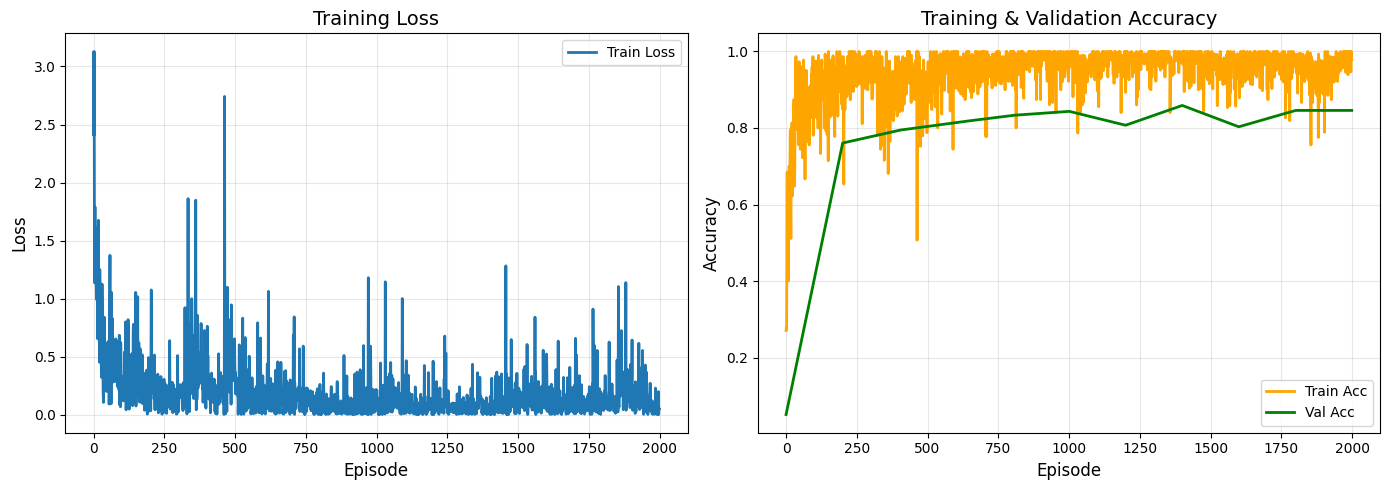

Displayed: learning_curves_k2.png

META-TESTING: 19-WAY, 2-SHOT PERFORMANCE (CROSS-DOMAIN)

OVERALL RESULTS (LSSO SPLIT):


,Metric,Value
0,Accuracy,0.8492
1,F1-Score (macro),0.8491
2,Precision (macro),0.8493
3,Recall (macro),0.8492



PER-CLASS ACCURACY (LSSO SPLIT):


,Class,Accuracy
0,sitting,0.8500
1,standing,0.8443
2,lying on back,0.8533
3,lying on right side,0.8717
4,ascending stairs,0.8347
5,descending stairs,0.8867
6,standing in an elevator still,0.8503
7,moving around in an elevator,0.8660
8,walking in a parking lot,0.8453
9,walking on a treadmill with a speed of 4 kmh,0.8110


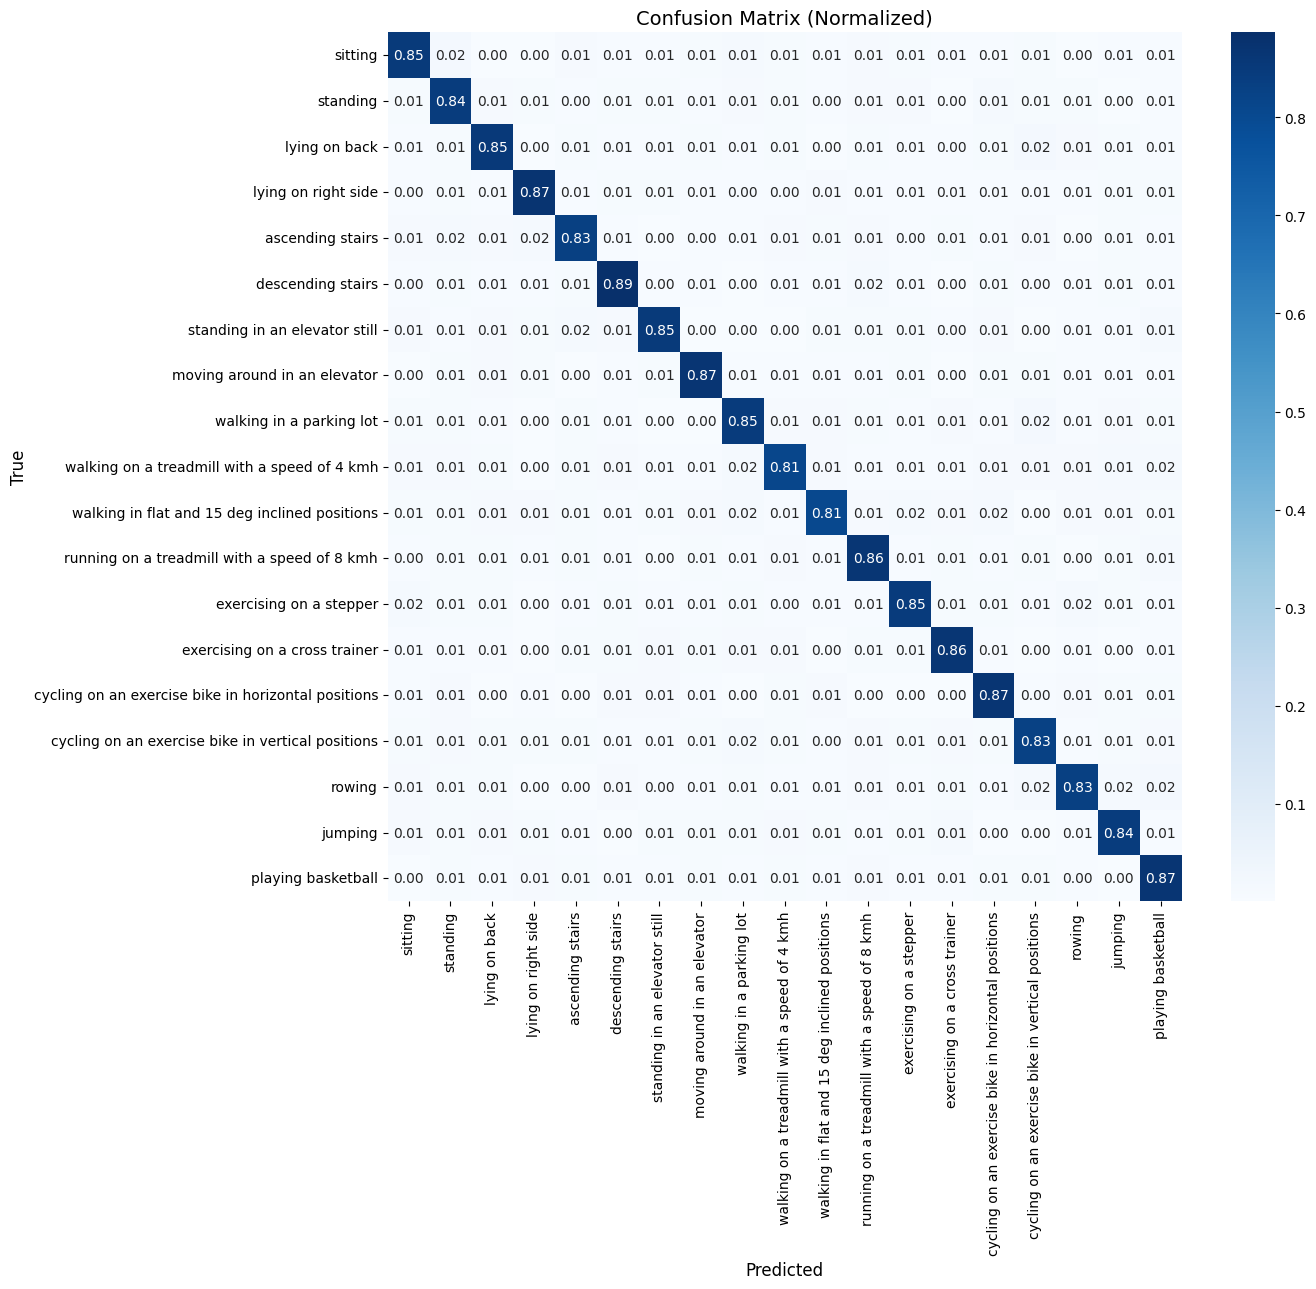


Displayed: cm_k2.png

K-SHOT ABLATION STUDY
Testing 1-shot...
Testing 3-shot...
Testing 5-shot...
Testing 10-shot...
Testing 20-shot...

K-SHOT COMPARISON:


,K-Shot,Accuracy,F1,Precision,Recall
0,1,0.8187,0.8186,0.8188,0.8187
1,3,0.8468,0.8468,0.8474,0.8468
2,5,0.8597,0.8597,0.8599,0.8597
3,10,0.8658,0.8658,0.8660,0.8658
4,20,0.8814,0.8814,0.8816,0.8814


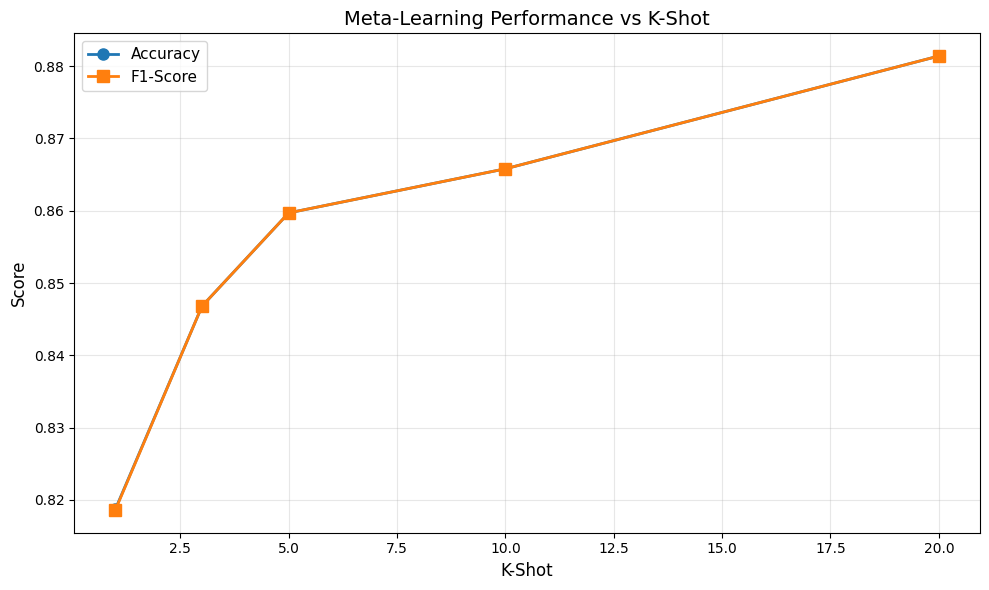


Displayed: kshot_comparison_k2.png

N-WAY ABLATION STUDY (K=2)
Testing 5-way...
Testing 10-way...
Testing 15-way...
Testing 19-way...

N-WAY COMPARISON:


,N-Way,Accuracy,F1,Precision,Recall
0,5,0.9469,0.9469,0.9471,0.9469
1,10,0.8981,0.8981,0.8983,0.8981
2,15,0.8674,0.8673,0.8676,0.8674
3,19,0.8442,0.8442,0.8447,0.8442



QUERY SET SIZE ABLATION (K=2)
Testing query=5...
Testing query=10...
Testing query=15...
Testing query=20...
Testing query=25...

QUERY SIZE COMPARISON:


,Query Size (q),Accuracy,F1,Precision,Recall
0,5,0.8458,0.8459,0.8468,0.8458
1,10,0.8333,0.8333,0.8340,0.8333
2,15,0.8443,0.8442,0.8447,0.8443
3,20,0.8476,0.8475,0.8482,0.8476
4,25,0.8452,0.8452,0.8456,0.8452



PER-USER PERSONALIZATION (ON TEST SET, K=2)


,User,Accuracy,F1,Precision,Recall
0,7,0.8996,0.8996,0.9009,0.8996
1,8,0.8007,0.8003,0.8019,0.8007



Mean User Accuracy (Test Set): 0.8501 ± 0.0494


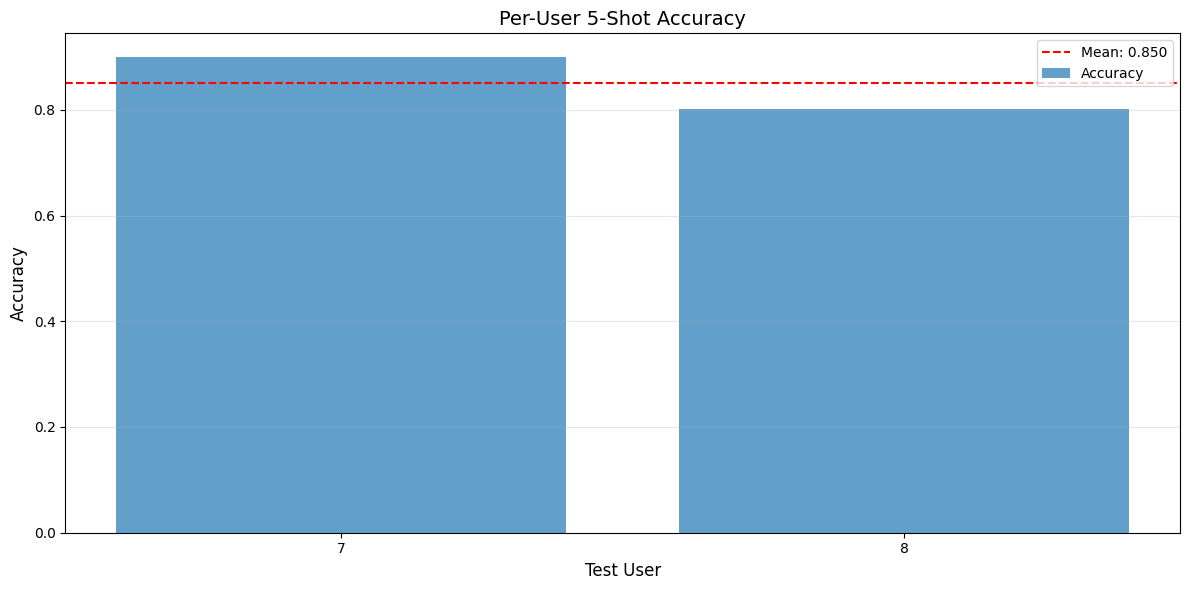

Displayed: user_performance_k2.png

FEATURE CALIBRATION / VARIANCE ANALYSIS


,Intra-Class Variance (L2),Inter-Class Variance (L2),Separation Ratio (Inter/Intra)
0,1.9623,6.0363,3.0761



ROBUSTNESS TEST (NOISY QUERY, K=2)
... Testing Robustness: Type=jitter, Level=0.1
    -> Acc: 0.8542, F1: 0.8542
... Testing Robustness: Type=jitter, Level=0.2
    -> Acc: 0.8419, F1: 0.8418
... Testing Robustness: Type=jitter, Level=0.3
    -> Acc: 0.8387, F1: 0.8387
... Testing Robustness: Type=dropout, Level=0.1
    -> Acc: 0.8409, F1: 0.8408
... Testing Robustness: Type=dropout, Level=0.2
    -> Acc: 0.7950, F1: 0.7950
... Testing Robustness: Type=dropout, Level=0.3
    -> Acc: 0.7333, F1: 0.7332
... Testing Robustness: Type=shift, Level=0.1
    -> Acc: 0.8460, F1: 0.8459
... Testing Robustness: Type=shift, Level=0.2
    -> Acc: 0.8443, F1: 0.8442
... Testing Robustness: Type=shift, Level=0.3
    -> Acc: 0.8250, F1: 0.8249

STARTING LEAVE-ONE-SUBJECT-OUT (LOSO) EXPERIMENT
Total Subjects: 8. This will run 8 training sessions.

--- LOSO Run 1/8: Testing on User 1 ---
Meta-Training for User 1...

Episode    0 | Loss: 3.4734 | Train Acc: 0.1963 | Val Acc: 0.0525
10 20 30 40 50 60 70 8

,User,Accuracy,F1,Precision,Recall
0,1,0.8632,0.8632,0.8638,0.8632
1,2,0.8993,0.8993,0.8996,0.8993
2,3,0.8298,0.8296,0.8299,0.8298
3,4,0.9030,0.9030,0.9033,0.9030
4,5,0.9329,0.9328,0.9331,0.9329
5,6,0.8355,0.8354,0.8359,0.8355
6,7,0.8559,0.8557,0.8563,0.8559
7,8,0.7987,0.7987,0.7994,0.7987



Mean LOSO Accuracy: 0.8648 ± 0.0444

LOSO EXPERIMENT FINAL SUMMARY (K=2)

Overall LOSO Mean Accuracy (8 Users): 0.8648 ± 0.0444
Overall LOSO Mean F1 (8 Users): 0.8647

COMPREHENSIVE SUMMARY FOR K-TRAIN = 2

STARTING FULL EXPERIMENT RUN FOR: K-TRAIN = 3-SHOT

BUILDING UNCERTAINTY-AWARE PROTOTYPE NETWORK

MODEL ARCHITECTURE & PERFORMANCE STATS


,Metric,Value
0,Parameters (M),0.40
1,FLOPs (M),1.39
2,Inference Time (ms),13.34



META-TRAINING (K=3, 2000 Episodes)

Episode    0 | Loss: 2.4133 | Train Acc: 0.3481 | Val Acc: 0.0546
10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 
Episode  200 | Loss: 0.0282 | Train Acc: 1.0000 | Val Acc: 0.8074
210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 
Episode  400 | Loss: 0.1209 | Train Acc: 0.9686 | Val Acc: 0.8565
410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 
Episode  600 | Loss: 0.0687 | Train Acc: 0.9818 | Val Acc: 0.8749
610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 
Episode  800 | Loss: 0.0048 | Train Acc: 1.0000 | Val Acc: 0.8791
810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 
Episode 1000 | Loss: 0.3223 | Train Acc: 0.9158 | Val Acc: 0.7877
1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 
Episode 1200 | Loss: 0.0204 | Train Acc: 1.0000 | Val Acc: 0.7795
121

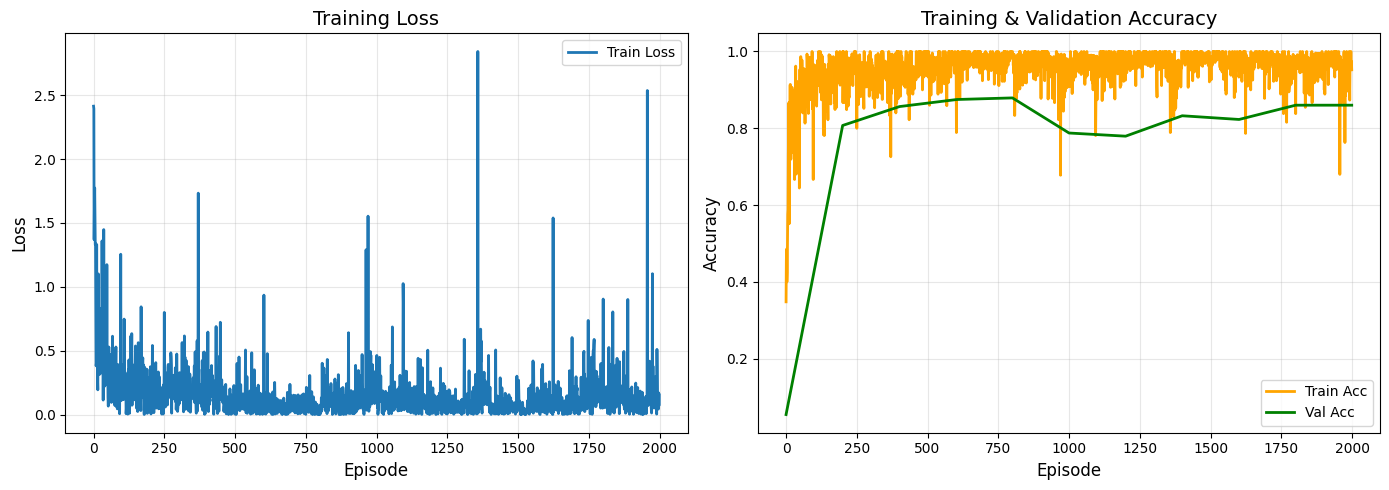

Displayed: learning_curves_k3.png

META-TESTING: 19-WAY, 3-SHOT PERFORMANCE (CROSS-DOMAIN)

OVERALL RESULTS (LSSO SPLIT):


,Metric,Value
0,Accuracy,0.8344
1,F1-Score (macro),0.8343
2,Precision (macro),0.8345
3,Recall (macro),0.8344



PER-CLASS ACCURACY (LSSO SPLIT):


,Class,Accuracy
0,sitting,0.8303
1,standing,0.8203
2,lying on back,0.8247
3,lying on right side,0.8493
4,ascending stairs,0.8510
5,descending stairs,0.8203
6,standing in an elevator still,0.8307
7,moving around in an elevator,0.8440
8,walking in a parking lot,0.8253
9,walking on a treadmill with a speed of 4 kmh,0.8360


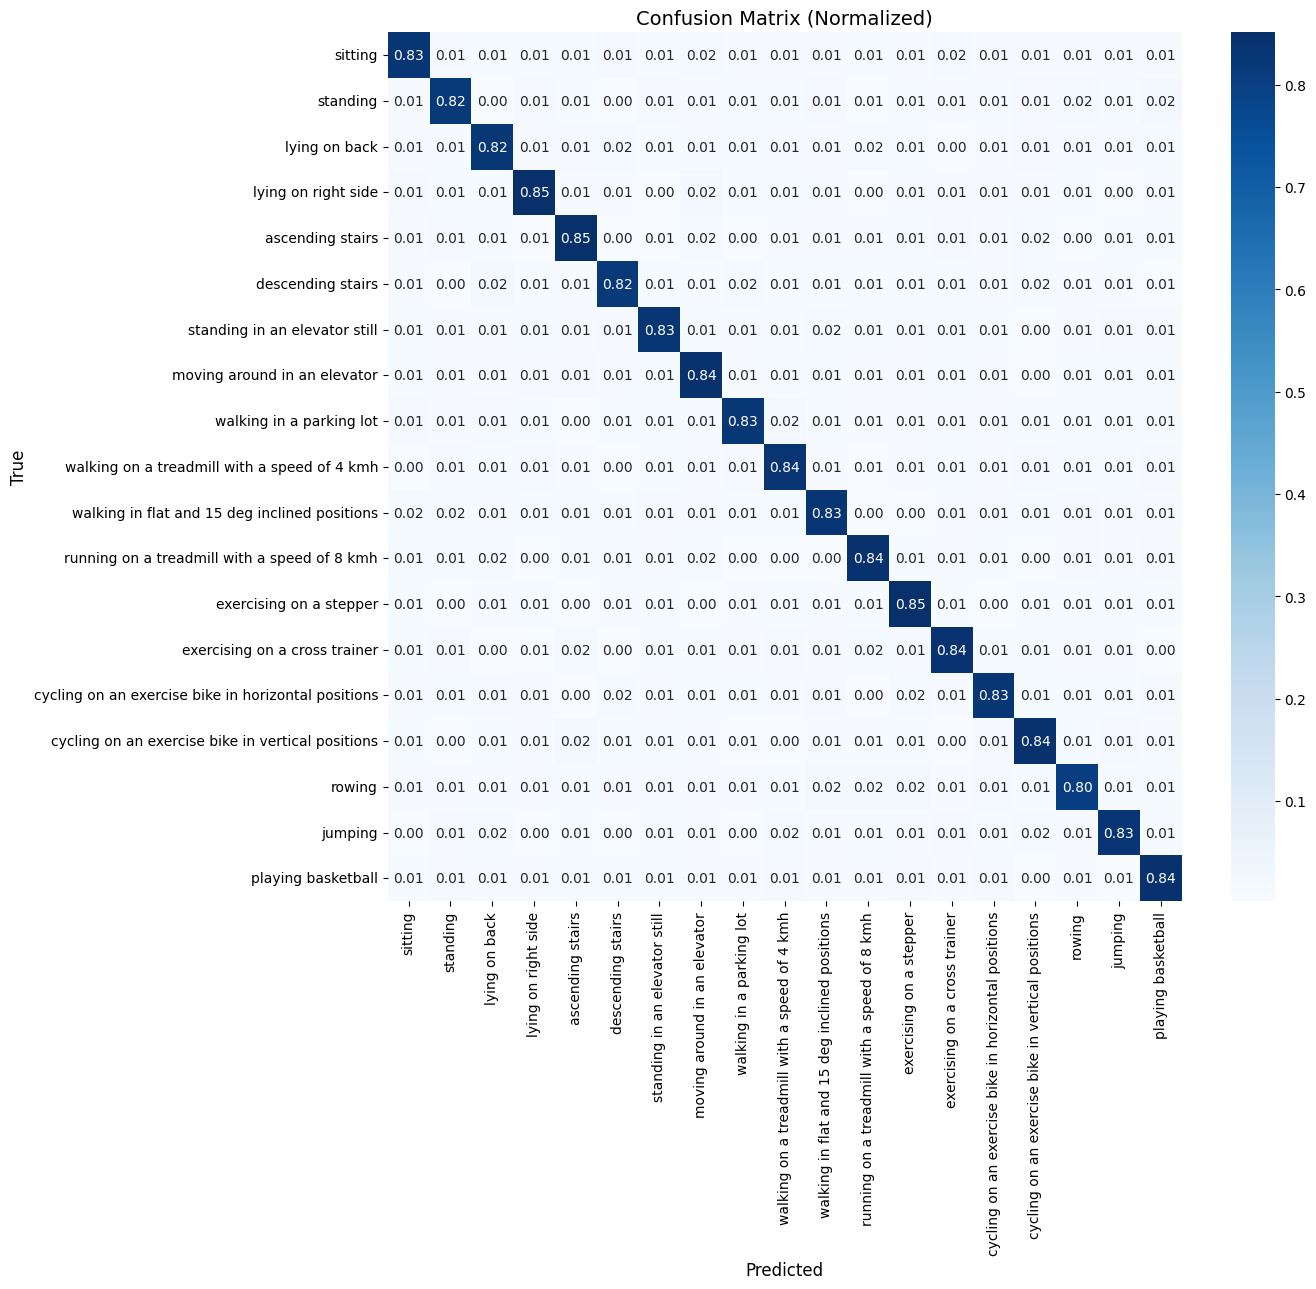


Displayed: cm_k3.png

K-SHOT ABLATION STUDY
Testing 1-shot...
Testing 3-shot...
Testing 5-shot...
Testing 10-shot...
Testing 20-shot...

K-SHOT COMPARISON:


,K-Shot,Accuracy,F1,Precision,Recall
0,1,0.7929,0.7928,0.7932,0.7929
1,3,0.8355,0.8354,0.8356,0.8355
2,5,0.8446,0.8445,0.8447,0.8446
3,10,0.8573,0.8573,0.8576,0.8573
4,20,0.8661,0.8661,0.8662,0.8661


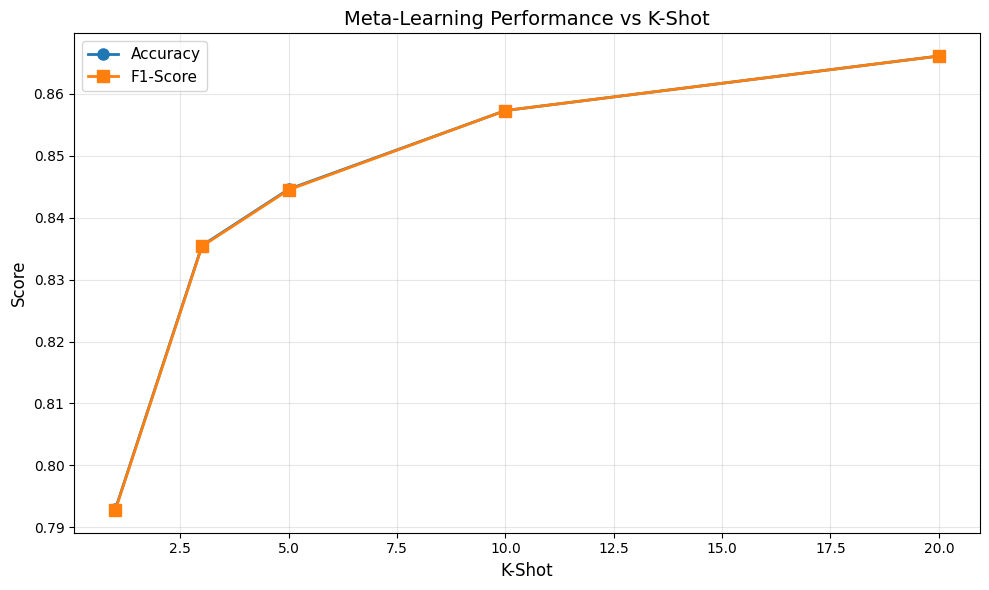


Displayed: kshot_comparison_k3.png

N-WAY ABLATION STUDY (K=3)
Testing 5-way...
Testing 10-way...
Testing 15-way...
Testing 19-way...

N-WAY COMPARISON:


,N-Way,Accuracy,F1,Precision,Recall
0,5,0.9508,0.9508,0.9508,0.9508
1,10,0.9035,0.9035,0.9038,0.9035
2,15,0.8645,0.8646,0.8647,0.8645
3,19,0.8362,0.8362,0.8365,0.8362



QUERY SET SIZE ABLATION (K=3)
Testing query=5...
Testing query=10...
Testing query=15...
Testing query=20...
Testing query=25...

QUERY SIZE COMPARISON:


,Query Size (q),Accuracy,F1,Precision,Recall
0,5,0.8243,0.8243,0.8247,0.8243
1,10,0.8297,0.8298,0.8301,0.8297
2,15,0.8381,0.8381,0.8384,0.8381
3,20,0.8303,0.8302,0.8307,0.8303
4,25,0.8366,0.8365,0.8368,0.8366



PER-USER PERSONALIZATION (ON TEST SET, K=3)


,User,Accuracy,F1,Precision,Recall
0,7,0.8409,0.8407,0.8415,0.8409
1,8,0.8232,0.8232,0.8238,0.8232



Mean User Accuracy (Test Set): 0.8320 ± 0.0088


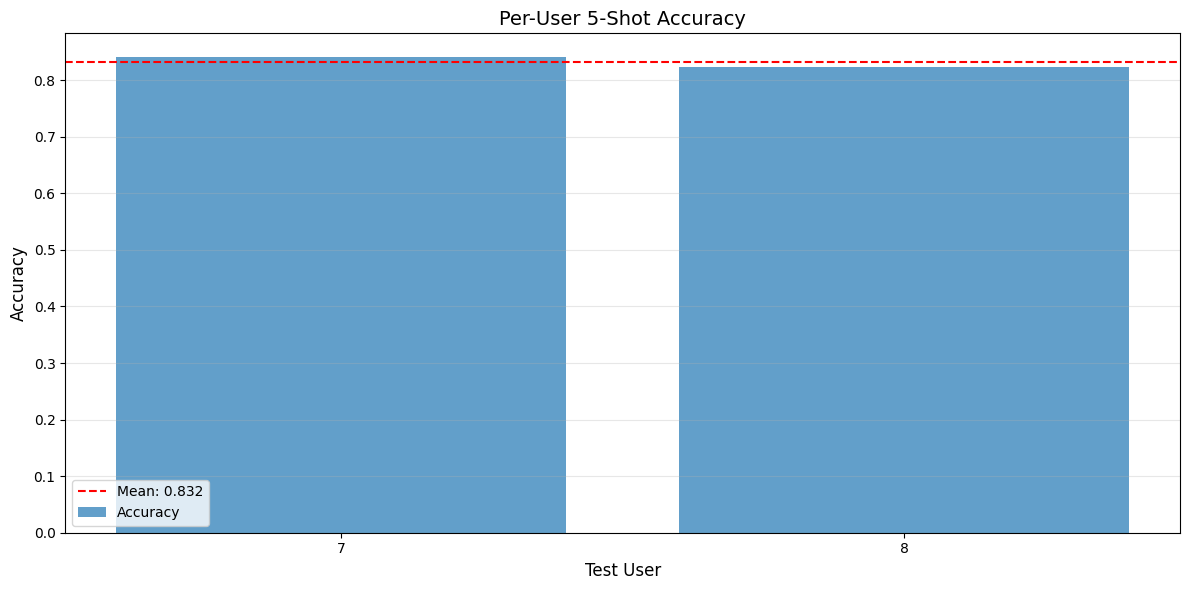

Displayed: user_performance_k3.png

FEATURE CALIBRATION / VARIANCE ANALYSIS


,Intra-Class Variance (L2),Inter-Class Variance (L2),Separation Ratio (Inter/Intra)
0,1.7201,5.6245,3.2699



ROBUSTNESS TEST (NOISY QUERY, K=3)
... Testing Robustness: Type=jitter, Level=0.1
    -> Acc: 0.8344, F1: 0.8343
... Testing Robustness: Type=jitter, Level=0.2
    -> Acc: 0.8371, F1: 0.8371
... Testing Robustness: Type=jitter, Level=0.3
    -> Acc: 0.8210, F1: 0.8210
... Testing Robustness: Type=dropout, Level=0.1
    -> Acc: 0.8045, F1: 0.8046
... Testing Robustness: Type=dropout, Level=0.2
    -> Acc: 0.7426, F1: 0.7425
... Testing Robustness: Type=dropout, Level=0.3
    -> Acc: 0.6334, F1: 0.6334
... Testing Robustness: Type=shift, Level=0.1
    -> Acc: 0.8340, F1: 0.8340
... Testing Robustness: Type=shift, Level=0.2
    -> Acc: 0.8155, F1: 0.8155
... Testing Robustness: Type=shift, Level=0.3
    -> Acc: 0.7833, F1: 0.7833

STARTING LEAVE-ONE-SUBJECT-OUT (LOSO) EXPERIMENT
Total Subjects: 8. This will run 8 training sessions.

--- LOSO Run 1/8: Testing on User 1 ---
Meta-Training for User 1...

Episode    0 | Loss: 2.8630 | Train Acc: 0.4185 | Val Acc: 0.0525
10 20 30 40 50 60 70 8

,User,Accuracy,F1,Precision,Recall
0,1,0.9054,0.9054,0.9058,0.9054
1,2,0.8730,0.8729,0.8733,0.8730
2,3,0.8762,0.8762,0.8765,0.8762
3,4,0.9022,0.9022,0.9025,0.9022
4,5,0.9425,0.9424,0.9427,0.9425
5,6,0.8429,0.8430,0.8438,0.8429
6,7,0.8700,0.8700,0.8702,0.8700
7,8,0.7938,0.7939,0.7948,0.7938



Mean LOSO Accuracy: 0.8758 ± 0.0445

LOSO EXPERIMENT FINAL SUMMARY (K=3)

Overall LOSO Mean Accuracy (8 Users): 0.8758 ± 0.0445
Overall LOSO Mean F1 (8 Users): 0.8758

COMPREHENSIVE SUMMARY FOR K-TRAIN = 3

STARTING FULL EXPERIMENT RUN FOR: K-TRAIN = 4-SHOT

BUILDING UNCERTAINTY-AWARE PROTOTYPE NETWORK

MODEL ARCHITECTURE & PERFORMANCE STATS


,Metric,Value
0,Parameters (M),0.40
1,FLOPs (M),1.39
2,Inference Time (ms),13.01



META-TRAINING (K=4, 2000 Episodes)

Episode    0 | Loss: 3.2358 | Train Acc: 0.4259 | Val Acc: 0.0504
10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 
Episode  200 | Loss: 0.1449 | Train Acc: 0.9333 | Val Acc: 0.8388
210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 
Episode  400 | Loss: 0.0189 | Train Acc: 0.9926 | Val Acc: 0.8405
410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 
Episode  600 | Loss: 0.1116 | Train Acc: 0.9614 | Val Acc: 0.8205
610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 
Episode  800 | Loss: 0.2153 | Train Acc: 0.9667 | Val Acc: 0.7977
810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 
Episode 1000 | Loss: 0.4069 | Train Acc: 0.8667 | Val Acc: 0.8112
1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 
Episode 1200 | Loss: 0.0034 | Train Acc: 1.0000 | Val Acc: 0.8535
121

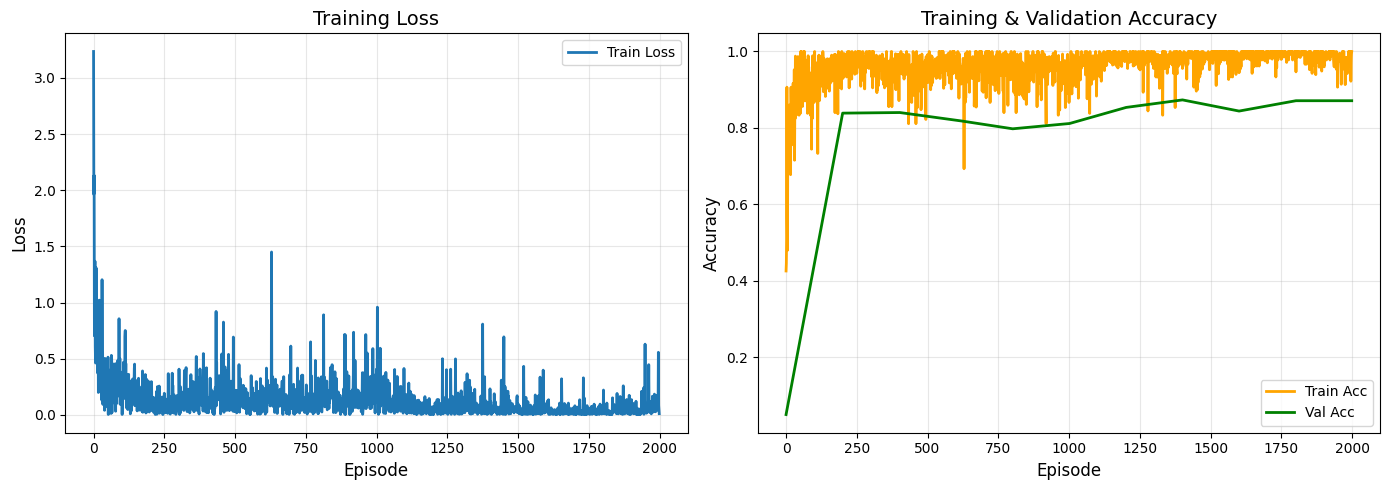

Displayed: learning_curves_k4.png

META-TESTING: 19-WAY, 4-SHOT PERFORMANCE (CROSS-DOMAIN)

OVERALL RESULTS (LSSO SPLIT):


,Metric,Value
0,Accuracy,0.8649
1,F1-Score (macro),0.8650
2,Precision (macro),0.8651
3,Recall (macro),0.8649



PER-CLASS ACCURACY (LSSO SPLIT):


,Class,Accuracy
0,sitting,0.8553
1,standing,0.8810
2,lying on back,0.8577
3,lying on right side,0.8800
4,ascending stairs,0.8627
5,descending stairs,0.8517
6,standing in an elevator still,0.8750
7,moving around in an elevator,0.8717
8,walking in a parking lot,0.8773
9,walking on a treadmill with a speed of 4 kmh,0.8460


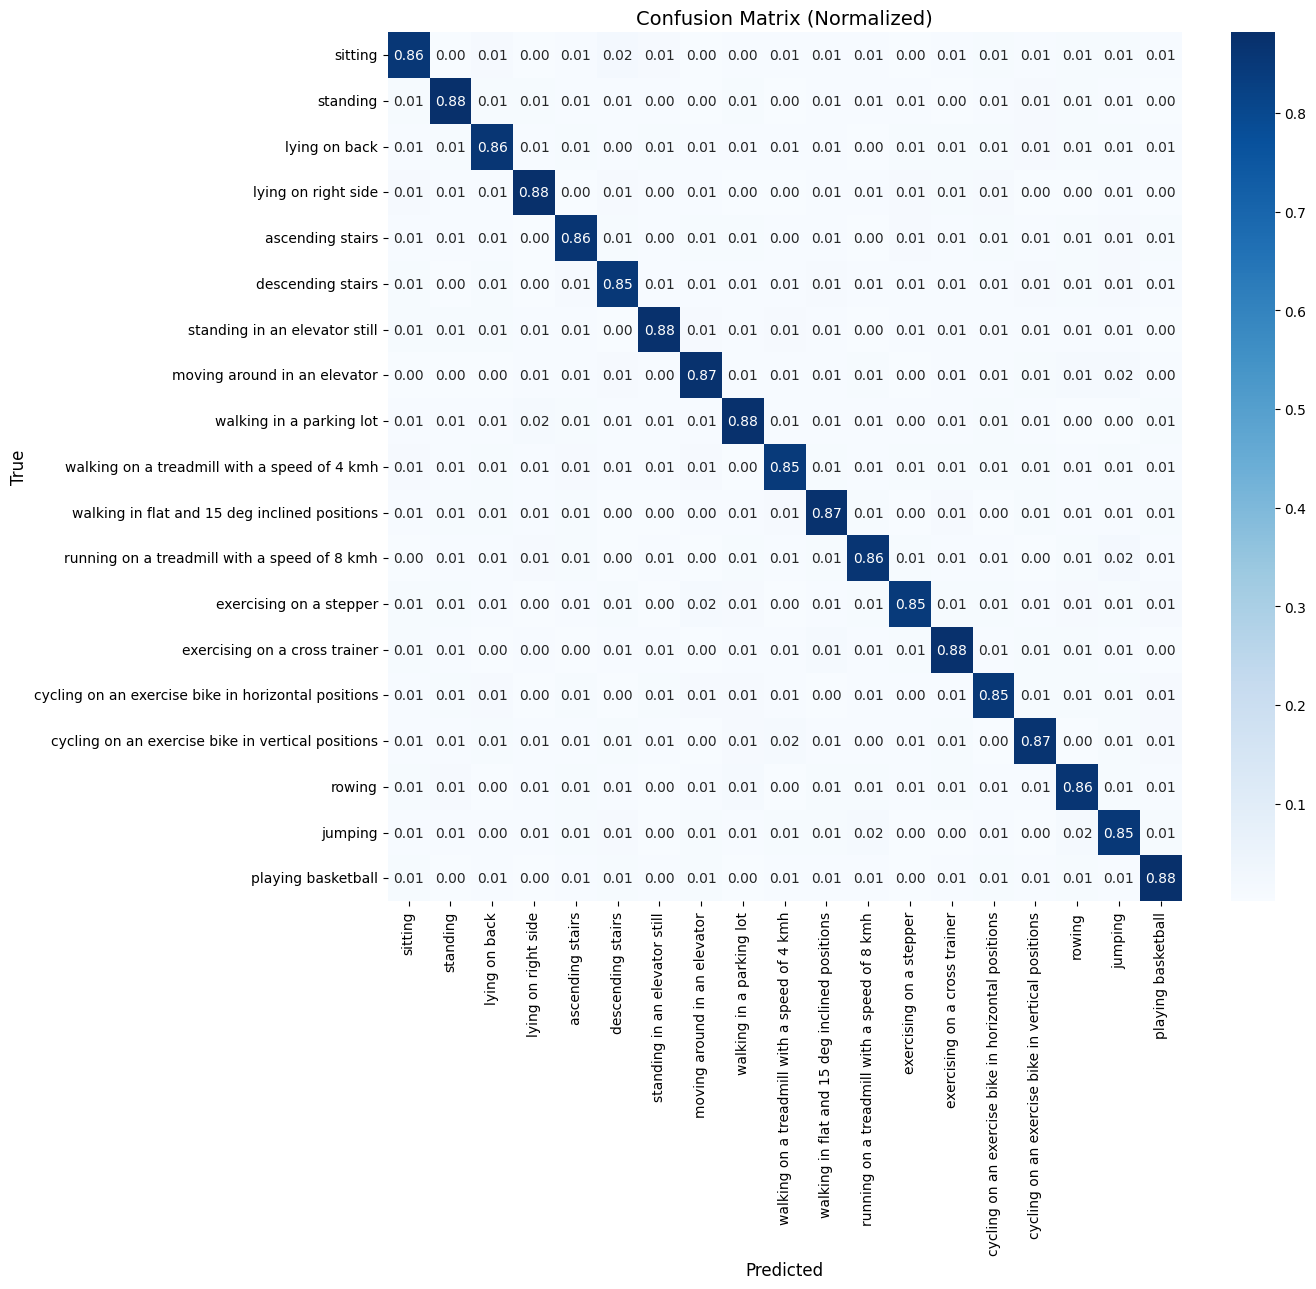


Displayed: cm_k4.png

K-SHOT ABLATION STUDY
Testing 1-shot...
Testing 3-shot...
Testing 5-shot...
Testing 10-shot...
Testing 20-shot...

K-SHOT COMPARISON:


,K-Shot,Accuracy,F1,Precision,Recall
0,1,0.8101,0.8100,0.8104,0.8101
1,3,0.8524,0.8524,0.8528,0.8524
2,5,0.8724,0.8724,0.8726,0.8724
3,10,0.8865,0.8865,0.8867,0.8865
4,20,0.8784,0.8784,0.8786,0.8784


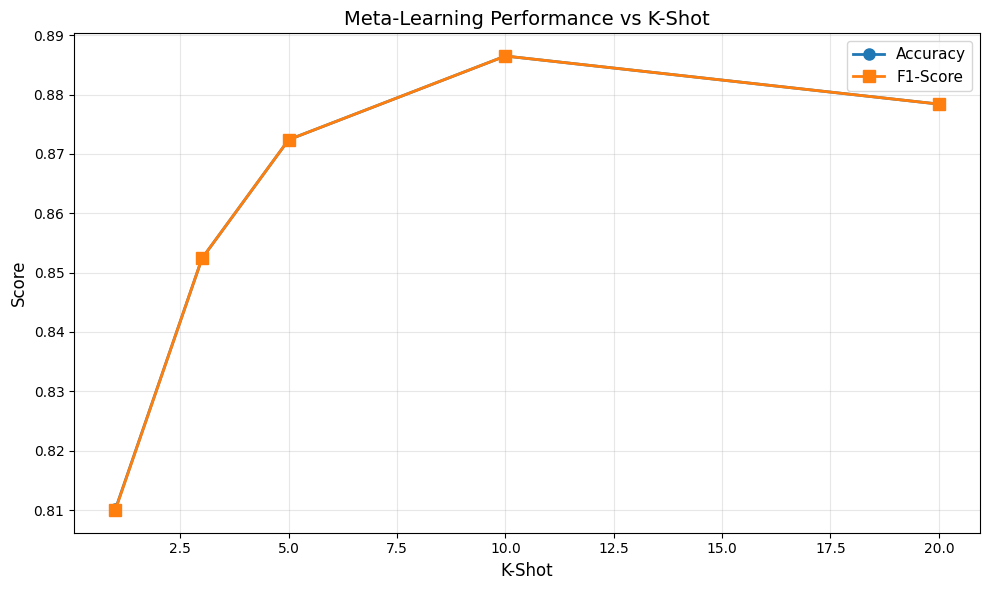


Displayed: kshot_comparison_k4.png

N-WAY ABLATION STUDY (K=4)
Testing 5-way...
Testing 10-way...
Testing 15-way...
Testing 19-way...

N-WAY COMPARISON:


,N-Way,Accuracy,F1,Precision,Recall
0,5,0.9481,0.9481,0.9482,0.9481
1,10,0.9275,0.9275,0.9277,0.9275
2,15,0.8877,0.8876,0.8878,0.8877
3,19,0.8574,0.8573,0.8576,0.8574



QUERY SET SIZE ABLATION (K=4)
Testing query=5...
Testing query=10...
Testing query=15...
Testing query=20...
Testing query=25...

QUERY SIZE COMPARISON:


,Query Size (q),Accuracy,F1,Precision,Recall
0,5,0.8576,0.8576,0.8583,0.8576
1,10,0.8531,0.8531,0.8535,0.8531
2,15,0.8659,0.8658,0.8662,0.8659
3,20,0.8698,0.8697,0.8699,0.8698
4,25,0.8679,0.8679,0.8680,0.8679



PER-USER PERSONALIZATION (ON TEST SET, K=4)


,User,Accuracy,F1,Precision,Recall
0,7,0.9051,0.9052,0.9057,0.9051
1,8,0.8292,0.8286,0.8301,0.8292



Mean User Accuracy (Test Set): 0.8672 ± 0.0379


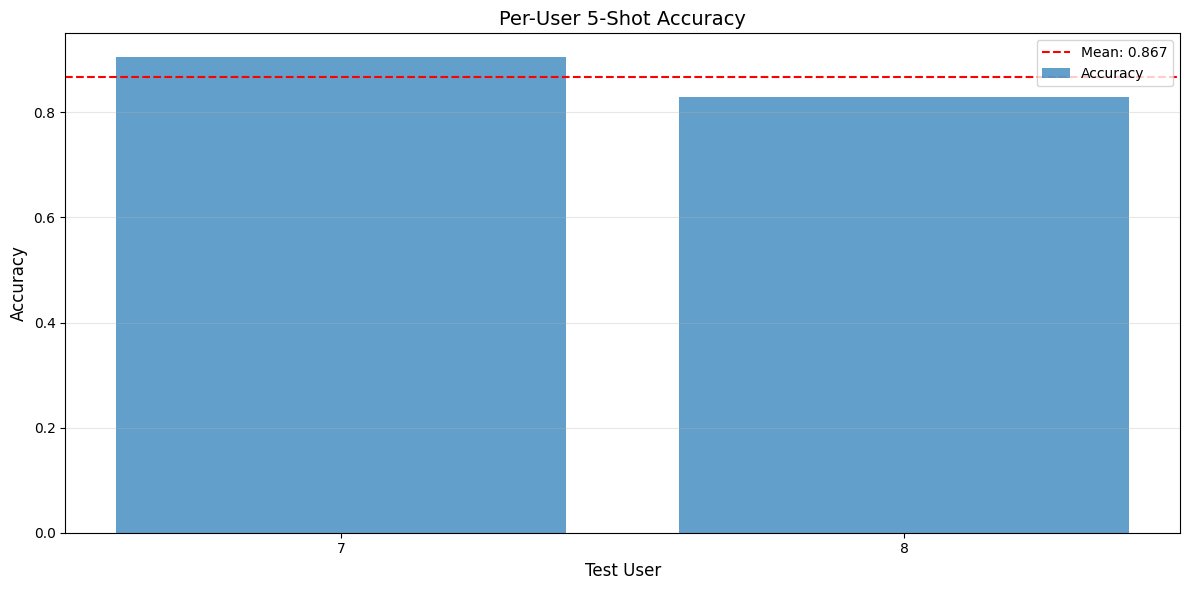

Displayed: user_performance_k4.png

FEATURE CALIBRATION / VARIANCE ANALYSIS


,Intra-Class Variance (L2),Inter-Class Variance (L2),Separation Ratio (Inter/Intra)
0,1.8380,6.9914,3.8038



ROBUSTNESS TEST (NOISY QUERY, K=4)
... Testing Robustness: Type=jitter, Level=0.1
    -> Acc: 0.8646, F1: 0.8645
... Testing Robustness: Type=jitter, Level=0.2
    -> Acc: 0.8658, F1: 0.8659
... Testing Robustness: Type=jitter, Level=0.3
    -> Acc: 0.8592, F1: 0.8592
... Testing Robustness: Type=dropout, Level=0.1
    -> Acc: 0.8530, F1: 0.8530
... Testing Robustness: Type=dropout, Level=0.2
    -> Acc: 0.8066, F1: 0.8066
... Testing Robustness: Type=dropout, Level=0.3
    -> Acc: 0.7251, F1: 0.7251
... Testing Robustness: Type=shift, Level=0.1
    -> Acc: 0.8619, F1: 0.8619
... Testing Robustness: Type=shift, Level=0.2
    -> Acc: 0.8576, F1: 0.8576
... Testing Robustness: Type=shift, Level=0.3
    -> Acc: 0.8398, F1: 0.8397

STARTING LEAVE-ONE-SUBJECT-OUT (LOSO) EXPERIMENT
Total Subjects: 8. This will run 8 training sessions.

--- LOSO Run 1/8: Testing on User 1 ---
Meta-Training for User 1...

Episode    0 | Loss: 3.6565 | Train Acc: 0.3542 | Val Acc: 0.0530
10 20 30 40 50 60 70 8

,User,Accuracy,F1,Precision,Recall
0,1,0.9042,0.9042,0.9044,0.9042
1,2,0.8941,0.8940,0.8944,0.8941
2,3,0.8727,0.8726,0.8728,0.8727
3,4,0.9178,0.9178,0.9181,0.9178
4,5,0.9527,0.9528,0.9529,0.9527
5,6,0.8766,0.8765,0.8772,0.8766
6,7,0.8879,0.8879,0.8883,0.8879
7,8,0.8281,0.8286,0.8300,0.8281



Mean LOSO Accuracy: 0.8918 ± 0.0363

LOSO EXPERIMENT FINAL SUMMARY (K=4)

Overall LOSO Mean Accuracy (8 Users): 0.8918 ± 0.0363
Overall LOSO Mean F1 (8 Users): 0.8918

COMPREHENSIVE SUMMARY FOR K-TRAIN = 4

STARTING FULL EXPERIMENT RUN FOR: K-TRAIN = 5-SHOT

BUILDING UNCERTAINTY-AWARE PROTOTYPE NETWORK

MODEL ARCHITECTURE & PERFORMANCE STATS


,Metric,Value
0,Parameters (M),0.40
1,FLOPs (M),1.39
2,Inference Time (ms),13.04



META-TRAINING (K=5, 2000 Episodes)

Episode    0 | Loss: 1.4316 | Train Acc: 0.7222 | Val Acc: 0.0521
10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 
Episode  200 | Loss: 0.2316 | Train Acc: 0.9375 | Val Acc: 0.8430
210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 
Episode  400 | Loss: 0.0363 | Train Acc: 1.0000 | Val Acc: 0.8072
410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 
Episode  600 | Loss: 0.0417 | Train Acc: 1.0000 | Val Acc: 0.8539
610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 
Episode  800 | Loss: 0.2151 | Train Acc: 0.9267 | Val Acc: 0.8518
810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 
Episode 1000 | Loss: 0.0981 | Train Acc: 0.9692 | Val Acc: 0.8605
1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 
Episode 1200 | Loss: 0.0026 | Train Acc: 1.0000 | Val Acc: 0.8716
121

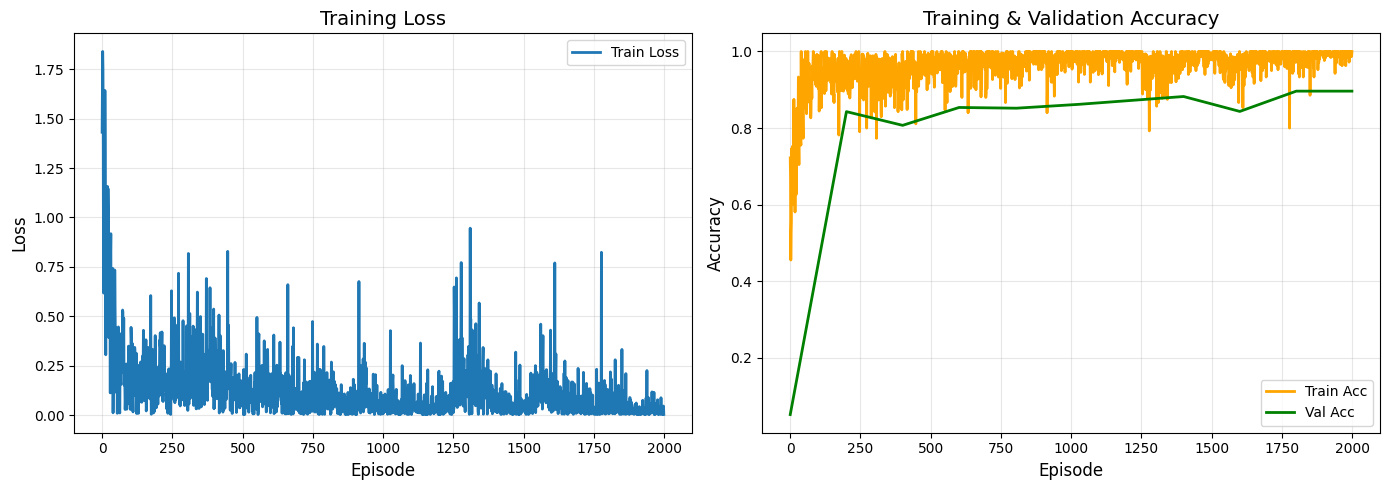

Displayed: learning_curves_k5.png

META-TESTING: 19-WAY, 5-SHOT PERFORMANCE (CROSS-DOMAIN)

OVERALL RESULTS (LSSO SPLIT):


,Metric,Value
0,Accuracy,0.8872
1,F1-Score (macro),0.8872
2,Precision (macro),0.8873
3,Recall (macro),0.8872



PER-CLASS ACCURACY (LSSO SPLIT):


,Class,Accuracy
0,sitting,0.8827
1,standing,0.8943
2,lying on back,0.8933
3,lying on right side,0.8933
4,ascending stairs,0.8913
5,descending stairs,0.8750
6,standing in an elevator still,0.8690
7,moving around in an elevator,0.8690
8,walking in a parking lot,0.8790
9,walking on a treadmill with a speed of 4 kmh,0.8960


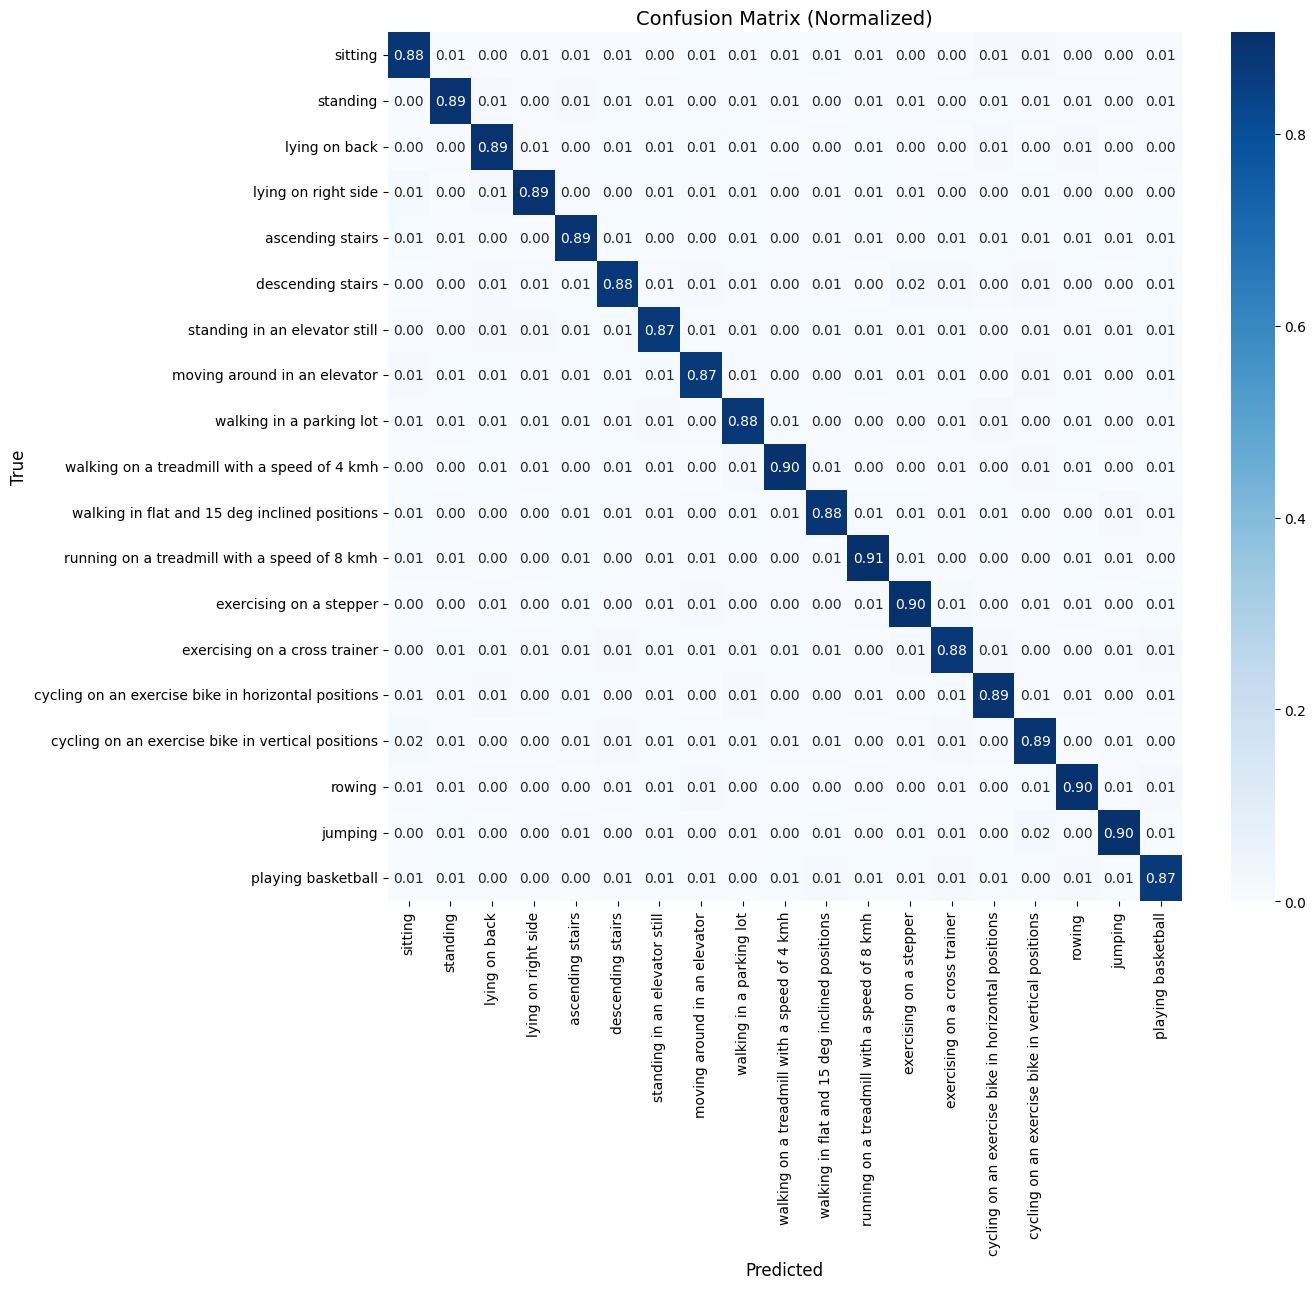


Displayed: cm_k5.png

K-SHOT ABLATION STUDY
Testing 1-shot...
Testing 3-shot...
Testing 5-shot...
Testing 10-shot...
Testing 20-shot...

K-SHOT COMPARISON:


,K-Shot,Accuracy,F1,Precision,Recall
0,1,0.8375,0.8374,0.8378,0.8375
1,3,0.8830,0.8830,0.8830,0.8830
2,5,0.8837,0.8837,0.8839,0.8837
3,10,0.8949,0.8948,0.8949,0.8949
4,20,0.8982,0.8982,0.8984,0.8982


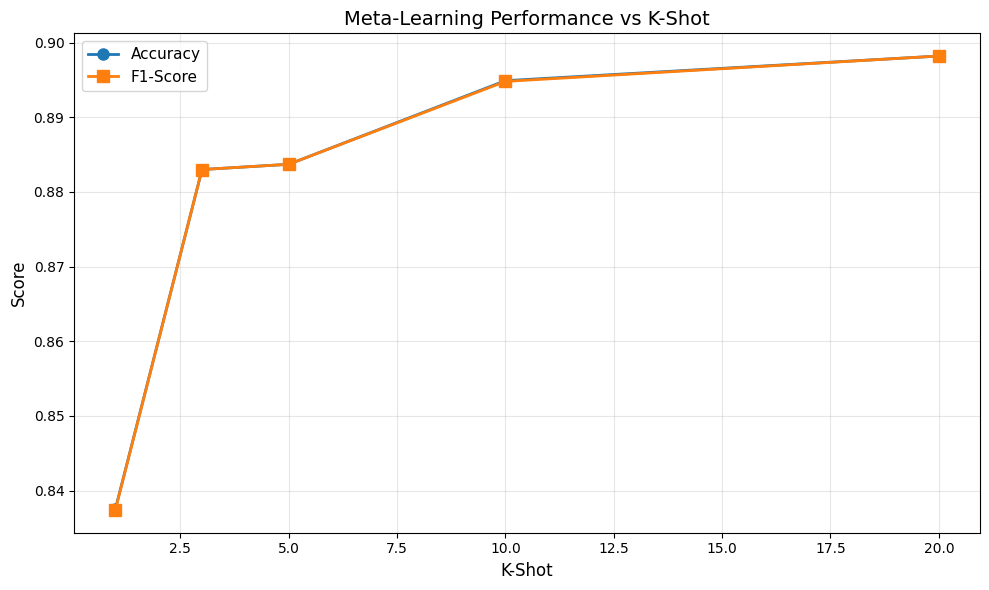


Displayed: kshot_comparison_k5.png

N-WAY ABLATION STUDY (K=5)
Testing 5-way...
Testing 10-way...
Testing 15-way...
Testing 19-way...

N-WAY COMPARISON:


,N-Way,Accuracy,F1,Precision,Recall
0,5,0.9605,0.9605,0.9605,0.9605
1,10,0.9332,0.9332,0.9333,0.9332
2,15,0.9095,0.9095,0.9096,0.9095
3,19,0.8920,0.8920,0.8921,0.8920



QUERY SET SIZE ABLATION (K=5)
Testing query=5...
Testing query=10...
Testing query=15...
Testing query=20...
Testing query=25...

QUERY SIZE COMPARISON:


,Query Size (q),Accuracy,F1,Precision,Recall
0,5,0.8836,0.8836,0.8840,0.8836
1,10,0.8912,0.8912,0.8914,0.8912
2,15,0.8795,0.8795,0.8797,0.8795
3,20,0.8885,0.8885,0.8887,0.8885
4,25,0.8957,0.8957,0.8958,0.8957



PER-USER PERSONALIZATION (ON TEST SET, K=5)


,User,Accuracy,F1,Precision,Recall
0,7,0.9301,0.9300,0.9305,0.9301
1,8,0.8547,0.8547,0.8562,0.8547



Mean User Accuracy (Test Set): 0.8924 ± 0.0377


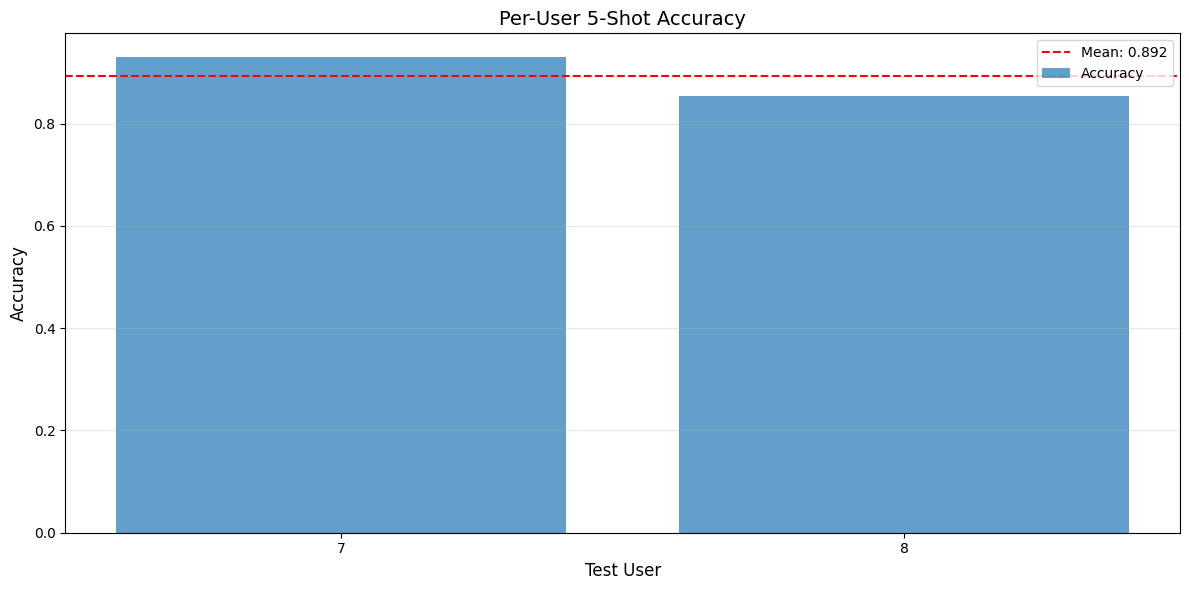

Displayed: user_performance_k5.png

FEATURE CALIBRATION / VARIANCE ANALYSIS


,Intra-Class Variance (L2),Inter-Class Variance (L2),Separation Ratio (Inter/Intra)
0,2.1281,6.7393,3.1668



ROBUSTNESS TEST (NOISY QUERY, K=5)
... Testing Robustness: Type=jitter, Level=0.1
    -> Acc: 0.8854, F1: 0.8854
... Testing Robustness: Type=jitter, Level=0.2
    -> Acc: 0.8888, F1: 0.8888
... Testing Robustness: Type=jitter, Level=0.3
    -> Acc: 0.8844, F1: 0.8843
... Testing Robustness: Type=dropout, Level=0.1
    -> Acc: 0.8779, F1: 0.8779
... Testing Robustness: Type=dropout, Level=0.2
    -> Acc: 0.8361, F1: 0.8360
... Testing Robustness: Type=dropout, Level=0.3
    -> Acc: 0.7504, F1: 0.7503
... Testing Robustness: Type=shift, Level=0.1
    -> Acc: 0.8884, F1: 0.8884
... Testing Robustness: Type=shift, Level=0.2
    -> Acc: 0.8787, F1: 0.8787
... Testing Robustness: Type=shift, Level=0.3
    -> Acc: 0.8644, F1: 0.8644

STARTING LEAVE-ONE-SUBJECT-OUT (LOSO) EXPERIMENT
Total Subjects: 8. This will run 8 training sessions.

--- LOSO Run 1/8: Testing on User 1 ---
Meta-Training for User 1...

Episode    0 | Loss: 3.5384 | Train Acc: 0.4491 | Val Acc: 0.0523
10 20 30 40 50 60 70 8

,User,Accuracy,F1,Precision,Recall
0,1,0.9145,0.9144,0.9146,0.9145
1,2,0.9077,0.9076,0.9080,0.9077
2,3,0.8889,0.8889,0.8892,0.8889
3,4,0.9251,0.9251,0.9254,0.9251
4,5,0.9507,0.9507,0.9508,0.9507
5,6,0.8744,0.8745,0.8750,0.8744
6,7,0.9090,0.9090,0.9093,0.9090
7,8,0.8619,0.8620,0.8623,0.8619



Mean LOSO Accuracy: 0.9040 ± 0.0284

LOSO EXPERIMENT FINAL SUMMARY (K=5)

Overall LOSO Mean Accuracy (8 Users): 0.9040 ± 0.0284
Overall LOSO Mean F1 (8 Users): 0.9040

COMPREHENSIVE SUMMARY FOR K-TRAIN = 5

===== ALL EXPERIMENTS COMPLETE: FINAL COMPREHENSIVE RESULTS =====


,Metric,Train K=1-Shot,Train K=2-Shot,Train K=3-Shot,Train K=4-Shot,Train K=5-Shot
0,Experiment,Train K=1-Shot,Train K=2-Shot,Train K=3-Shot,Train K=4-Shot,Train K=5-Shot
1,Parameters (M),0.40,0.40,0.40,0.40,0.40
2,FLOPs (M),1.39,1.39,1.39,1.39,1.39
3,Inference Time (ms),13.17,13.27,13.34,13.01,13.04
4,--- LSSO Test (Users [7 8]) ---,---,---,---,---,---
5,Accuracy (19W-1S),0.8394,0.8187,0.7929,0.8101,0.8375
6,F1 (19W-1S),0.8393,0.8186,0.7928,0.8100,0.8374
7,--- Few-Shot Scaling (LSSO) ---,---,---,---,---,---
8,Accuracy (19W-1S),0.8376,0.8187,0.7929,0.8101,0.8375
9,F1 (19W-1S),0.8376,0.8186,0.7928,0.8100,0.8374


In [10]:
import os
import random
import time
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from thop import profile
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import re
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from glob import glob
import pickle

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = False
    torch.backends.cudnn.benchmark = True

def compute_mean_std(X):
    X = X.astype(np.float32)
    mean = X.mean(axis=(0, 2), keepdims=True)
    std  = X.std(axis=(0, 2), keepdims=True) + 1e-8
    return mean, std

def augment_data(x_batch, jitter_sigma=0.03, scale_max=0.1):
    jitter = torch.randn_like(x_batch) * jitter_sigma
    x_batch = x_batch + jitter

    scale = 1.0 + (torch.rand(x_batch.shape[0], 1, 1, device=x_batch.device) - 0.5) * 2 * scale_max
    x_batch = x_batch * scale

    return x_batch

def compute_model_stats(encoder, input_shape=(1, 45, 25)):
    device = next(encoder.parameters()).device
    macs, params = profile(encoder, inputs=(torch.randn(*input_shape).to(device),), verbose=False)
    return params/1e6, macs/1e6

def measure_inference_time(model, n_way, sz=(1, 45, 25), dev='cuda', runs=100, warm=10):
    model.eval()
    x_q = torch.randn(sz, device=dev)
    x_s = torch.randn((n_way*5,) + sz[1:], device=dev)
    y_s = torch.tensor(np.repeat(range(n_way), 5), device=dev)

    with torch.no_grad():
        for _ in range(warm):
            _, _ = model(x_q, x_s, y_s, n_way)
    torch.cuda.synchronize() if dev=='cuda' else None
    t0 = time.time()
    with torch.no_grad():
        for _ in range(runs):
            _, _ = model(x_q, x_s, y_s, n_way)
    torch.cuda.synchronize() if dev=='cuda' else None
    return (time.time()-t0)/runs*1000

def plot_confusion_matrix(cm, labels):
    cmn = cm.astype('float')/cm.sum(axis=1)[:,None]
    df = pd.DataFrame(cmn, index=labels, columns=labels)
    plt.figure(figsize=(14,13))
    sns.heatmap(df, annot=True, fmt='.2f', cmap='Blues', cbar=True)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('True', fontsize=12)
    plt.title('Confusion Matrix (Normalized)', fontsize=14)
    plt.tight_layout()
    plt.show()

def plot_learning_curves(train_losses, train_accs, val_accs):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    ax1.plot(train_losses, linewidth=2, label='Train Loss')
    ax1.set_xlabel('Episode', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.set_title('Training Loss', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    ax2.plot(train_accs, linewidth=2, color='orange', label='Train Acc')
    ax2.plot(val_accs, linewidth=2, color='green', label='Val Acc')
    ax2.set_xlabel('Episode', fontsize=12)
    ax2.set_ylabel('Accuracy', fontsize=12)
    ax2.set_title('Training & Validation Accuracy', fontsize=14)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_kshot_comparison(shot_results):
    plt.figure(figsize=(10, 6))
    plt.plot([r['K'] for r in shot_results], [r['Accuracy'] for r in shot_results],
             marker='o', linewidth=2, markersize=8, label='Accuracy')
    plt.plot([r['K'] for r in shot_results], [r['F1'] for r in shot_results],
             marker='s', linewidth=2, markersize=8, label='F1-Score')
    plt.xlabel('K-Shot', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.title('Meta-Learning Performance vs K-Shot', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_user_performance(per_user_df):
    plt.figure(figsize=(12, 6))
    x = range(len(per_user_df))
    plt.bar(x, per_user_df['Accuracy'], alpha=0.7, label='Accuracy')
    plt.axhline(y=per_user_df['Accuracy'].mean(), color='r', linestyle='--',
                label=f'Mean: {per_user_df["Accuracy"].mean():.3f}')
    plt.xlabel('Test User', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Per-User 5-Shot Accuracy', fontsize=14)
    plt.xticks(x, per_user_df['User'])
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

class HARDataset(Dataset):
    def __init__(self, X, y, norm=True):
        self.X = X.astype(np.float32)
        self.y = y.astype(np.int64)
        if norm:
            self.mean = self.X.mean(axis=(0,2), keepdims=True)
            self.std = self.X.std(axis=(0,2), keepdims=True) + 1e-8
            self.X = (self.X - self.mean)/self.std
        else:
            self.mean, self.std = None, None

    def set_stats(self, mean, std):
        self.mean, self.std = mean, std
        self.X = (self.X - self.mean)/self.std

    def __len__(self):
        return len(self.y)

    def __getitem__(self, i):
        return torch.from_numpy(self.X[i]), int(self.y[i])

def load_dsads_data(data_path, w_s=25, stride=12):
    print(f"Loading DSADS data with window={w_s}, stride={stride}")
    all_windows = []
    all_labels = []
    all_subjects = []

    activities = {
        'a01': 'sitting', 'a02': 'standing', 'a03': 'lying on back',
        'a04': 'lying on right side', 'a05': 'ascending stairs',
        'a06': 'descending stairs', 'a07': 'standing in an elevator still',
        'a08': 'moving around in an elevator', 'a09': 'walking in a parking lot',
        'a10': 'walking on a treadmill with a speed of 4 kmh',
        'a11': 'walking in flat and 15 deg inclined positions',
        'a12': 'running on a treadmill with a speed of 8 kmh',
        'a13': 'exercising on a stepper', 'a14': 'exercising on a cross trainer',
        'a15': 'cycling on an exercise bike in horizontal positions',
        'a16': 'cycling on an exercise bike in vertical positions',
        'a17': 'rowing', 'a18': 'jumping', 'a19': 'playing basketball'
    }
    activity_codes = sorted(activities.keys())

    label_encoder = LabelEncoder()
    label_encoder.fit(activity_codes)

    persons = ['p' + str(i) for i in range(1, 9)]

    for person_str in persons:
        subject_id = int(person_str[1:])

        for activity_str in activity_codes:
            activity_label = label_encoder.transform([activity_str])[0]

            pattern = os.path.join(data_path, activity_str, person_str, 's*.txt')
            segment_files = sorted(glob(pattern))

            if not segment_files:
                continue

            for f in segment_files:
                try:
                    segment_data = np.loadtxt(f, delimiter=',')
                    if segment_data.shape[0] < w_s:
                        continue

                    start = 0
                    while start + w_s <= segment_data.shape[0]:
                        window_data = segment_data[start : start + w_s, :]
                        all_windows.append(window_data)
                        all_labels.append(activity_label)
                        all_subjects.append(subject_id)
                        start += stride

                except Exception as e:
                    print(f"Error loading or windowing {f}: {e}")

    if not all_windows:
        return None, None, None, None

    X_windowed = np.array(all_windows, dtype=np.float32)
    y_encoded = np.array(all_labels, dtype=int)
    subjects = np.array(all_subjects, dtype=int)

    X_windowed = np.transpose(X_windowed, (0, 2, 1))

    activity_names_sorted = [activities[code] for code in label_encoder.classes_]

    return X_windowed, y_encoded, subjects, activity_names_sorted

class CompactEncoder(nn.Module):
    def __init__(self, in_channels=9, embed_dim=128):
        super().__init__()
        self.stage1 = self._make_stage(in_channels, 32, stride=2)
        self.stage2 = self._make_stage(32, 64, stride=2)
        self.stage3 = self._make_stage(64, 128, stride=2)
        self.stage4 = self._make_stage(128, embed_dim, stride=2)
        self.pool = nn.AdaptiveAvgPool1d(1)

    def _make_stage(self, in_ch, out_ch, stride=1):
        return nn.Sequential(
            nn.Conv1d(in_ch, out_ch, kernel_size=5, stride=stride, padding=2),
            nn.BatchNorm1d(out_ch),
            nn.GELU(),
            nn.Conv1d(out_ch, out_ch, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(out_ch),
            nn.GELU(),
            nn.Conv1d(out_ch, out_ch, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(out_ch),
            nn.GELU()
        )

    def forward(self, x):
        x = self.stage1(x)
        x = self.stage2(x)
        x = self.stage3(x)
        x = self.stage4(x)
        x = self.pool(x).flatten(1)
        return x

class UncertaintyEncoder(nn.Module):
    def __init__(self, base_cnn, feature_dim):
        super().__init__()
        self.base = base_cnn
        self.fc_mu = nn.Linear(feature_dim, feature_dim)
        self.fc_logvar = nn.Linear(feature_dim, feature_dim)

    def forward(self, x):
        feat = self.base(x)
        mu = self.fc_mu(feat)
        logvar = self.fc_logvar(feat)
        return mu, logvar

class PrototypeNetwork(nn.Module):
    def __init__(self, encoder, temperature=1.0):
        super().__init__()
        self.encoder = encoder
        self.temperature = temperature

        feature_dim = encoder.fc_mu.in_features

        self.attention = nn.Sequential(
            nn.Linear(feature_dim, feature_dim // 2),
            nn.ReLU(),
            nn.Linear(feature_dim // 2, 1)
        )
        self.adapter = nn.Sequential(
            nn.Linear(feature_dim * 2, feature_dim),
            nn.ReLU(),
            nn.Linear(feature_dim, feature_dim)
        )

    def compute_prototypes(self, support_mu, support_logvar, support_y, n_way):
        embed_dim = support_mu.size(1)
        prototypes_mu = []
        prototypes_sigma = []

        for c in range(n_way):
            mask = (support_y == c)
            if mask.sum() > 0:
                mu_c = support_mu[mask]
                logvar_c = support_logvar[mask]

                attn_w = F.softmax(self.attention(mu_c), dim=0)

                sigma_c_sq = torch.exp(logvar_c)
                var_w = 1.0 / (sigma_c_sq + 1e-6)

                weight = attn_w * var_w

                weighted_mu = (weight * mu_c).sum(0) / weight.sum(0)

                weighted_sigma_sq = 1.0 / weight.sum(0)
                weighted_sigma = torch.sqrt(weighted_sigma_sq)

                prototypes_mu.append(weighted_mu)
                prototypes_sigma.append(weighted_sigma)
            else:
                prototypes_mu.append(torch.zeros(embed_dim, device=support_mu.device))
                prototypes_sigma.append(torch.ones(embed_dim, device=support_mu.device))

        return torch.stack(prototypes_mu), torch.stack(prototypes_sigma)

    def forward(self, query_x, support_x, support_y, n_way):
        support_mu, support_logvar = self.encoder(support_x)
        query_mu, query_logvar = self.encoder(query_x)

        prototypes_mu, prototypes_sigma = self.compute_prototypes(support_mu, support_logvar, support_y, n_way)

        query_sigma = torch.exp(0.5 * query_logvar)

        n_query = query_mu.size(0)

        query_mu_expanded = query_mu.unsqueeze(1).expand(-1, n_way, -1)
        query_sigma_expanded = query_sigma.unsqueeze(1).expand(-1, n_way, -1)

        proto_mu_expanded = prototypes_mu.unsqueeze(0).expand(n_query, -1, -1)
        proto_sigma_expanded = prototypes_sigma.unsqueeze(0).expand(n_query, -1, -1)

        cat_input = torch.cat([query_mu_expanded, proto_mu_expanded], dim=-1)
        delta = self.adapter(cat_input)
        adapted_mu = proto_mu_expanded + delta

        mu_diff_sq = (query_mu_expanded - adapted_mu)**2
        sigma_sum_sq = query_sigma_expanded**2 + proto_sigma_expanded**2 + 1e-6
        dist = (mu_diff_sq / sigma_sum_sq).sum(dim=-1)

        logits = -dist / self.temperature

        all_mu = torch.cat([support_mu, query_mu], dim=0)
        all_logvar = torch.cat([support_logvar, query_logvar], dim=0)
        kl_div = -0.5 * torch.sum(1 + all_logvar - all_mu.pow(2) - all_logvar.exp(), dim=1).mean()

        return logits, kl_div


def create_episodes(users_data, n_way=6, k_shot=5, q_query=15, total_classes=6):
    if not users_data:
        return (torch.empty(0), torch.empty(0), torch.empty(0), torch.empty(0))

    for _ in range(50):
        user = random.choice(users_data)
        data = user['data']
        labels = user['labels']
        unique_cls = np.unique(labels)

        if len(unique_cls) < n_way:
            continue

        chosen_classes = np.random.choice(unique_cls, n_way, replace=False)
        support_x, support_y, query_x, query_y = [], [], [], []

        valid_episode = True
        for new_c, original_c in enumerate(chosen_classes):
            idxs = np.where(labels == original_c)[0]
            if len(idxs) < k_shot + q_query:
                valid_episode = False
                break

            np.random.shuffle(idxs)
            s_idx = idxs[:k_shot]
            q_idx = idxs[k_shot:k_shot+q_query]

            support_x.extend([data[i] for i in s_idx])
            support_y.extend([new_c] * k_shot)
            query_x.extend([data[i] for i in q_idx])
            query_y.extend([new_c] * q_query)

        if valid_episode:
            if not support_x or not query_x:
                continue
            return (torch.stack(support_x), torch.tensor(support_y),
                    torch.stack(query_x), torch.tensor(query_y))

    return (torch.empty(0), torch.empty(0), torch.empty(0), torch.empty(0))

def meta_train(model, optimizer, train_users, val_users, n_way_range, k_shot=5, q_query=15,
               episodes=2000, log_every=100, val_every=200, kl_weight=0.001, total_classes=6):
    model.train()
    train_losses, train_accs, val_accs = [], [], []


    for ep in range(episodes):
        if (ep+1) % 10 == 0 :
            print(ep+1, end=' ')

        n_way = random.randint(n_way_range[0], n_way_range[1])

        support_x, support_y, query_x, query_y = create_episodes(train_users, n_way, k_shot, q_query, total_classes=total_classes)
        if support_x.size(0) == 0:
            continue

        support_x = augment_data(support_x)
        query_x = augment_data(query_x)

        support_x, support_y = support_x.cuda(), support_y.cuda()
        query_x, query_y = query_x.cuda(), query_y.cuda()

        logits, kl_div = model(query_x, support_x, support_y, n_way)
        ce_loss = F.cross_entropy(logits, query_y)
        loss = ce_loss + kl_weight * kl_div

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = (logits.argmax(1) == query_y).float().mean().item()
        train_losses.append(loss.item())
        train_accs.append(acc)

        if ep % val_every == 0:
            val_acc = meta_validate(model, val_users, k_shot, n_way_range[1], trials=20, total_classes=total_classes)
            val_accs.append(val_acc)
            if ep % log_every == 0:
                print ()
                print(f"Episode {ep:4d} | Loss: {loss.item():.4f} | Train Acc: {acc:.4f} | Val Acc: {val_acc:.4f}")
        elif ep % log_every == 0:
            print ()
            print(f"Episode {ep:4d} | Loss: {loss.item():.4f} | Train Acc: {acc:.4f}")

    val_episodes = list(range(0, episodes, val_every))
    if len(val_accs) < len(val_episodes) and len(val_accs) > 0:
        val_accs.extend([val_accs[-1]] * (len(val_episodes) - len(val_accs)))
    elif len(val_accs) == 0:
        val_accs = [0.0] * len(val_episodes)

    return train_losses, train_accs, val_accs, val_episodes

def meta_validate(model, val_users, k_shot=5, n_way=6, trials=20, total_classes=6):
    model.eval()
    correct, total = 0, 0
    for _ in range(trials):
        support_x, support_y, query_x, query_y = create_episodes(val_users, n_way, k_shot, 15, total_classes=total_classes)
        if support_x.size(0) == 0:
            continue
        support_x, support_y = support_x.cuda(), support_y.cuda()
        query_x, query_y = query_x.cuda(), query_y.cuda()
        with torch.no_grad():
            logits, _ = model(query_x, support_x, support_y, n_way)
            preds = logits.argmax(1)
            correct += (preds == query_y).sum().item()
            total += len(query_y)
    model.train()
    return correct / total if total > 0 else 0.0

def meta_test(model, test_users, k_shot=5, n_way=6, q_query=15, trials=100, total_classes=6):
    model.eval()
    all_preds, all_trues = [], []

    for _ in range(trials):
        support_x, support_y, query_x, query_y = create_episodes(test_users, n_way, k_shot, q_query, total_classes=total_classes)
        if support_x.size(0) == 0:
            continue
        support_x, support_y = support_x.cuda(), support_y.cuda()
        query_x, query_y = query_x.cuda(), query_y.cuda()

        with torch.no_grad():
            logits, _ = model(query_x, support_x, support_y, n_way)
            preds = logits.argmax(1).cpu().numpy()
            all_preds.extend(preds)
            all_trues.extend(query_y.cpu().numpy())

    if not all_trues:
        return 0, 0, 0, 0, np.zeros((n_way, n_way)), [], [], [0.0]*n_way

    acc = accuracy_score(all_trues, all_preds)
    f1 = f1_score(all_trues, all_preds, average='macro', zero_division=0)
    prec = precision_score(all_trues, all_preds, average='macro', zero_division=0)
    rec = recall_score(all_trues, all_preds, average='macro', zero_division=0)
    cm = confusion_matrix(all_trues, all_preds, labels=range(n_way))

    per_class_acc = []
    for c in range(n_way):
        mask = np.array(all_trues) == c
        if mask.sum() > 0:
            class_acc = accuracy_score(np.array(all_trues)[mask], np.array(all_preds)[mask])
            per_class_acc.append(class_acc)
        else:
            per_class_acc.append(0.0)

    return acc, f1, prec, rec, cm, all_preds, all_trues, per_class_acc

def prepare_users(X, y, sub, subs, mean, std):
    users = []
    for uid in subs:
        mask = (sub == uid)
        user_data = X[mask]
        user_labels = y[mask]
        user_dataset = HARDataset(user_data, user_labels, norm=False)
        user_dataset.set_stats(mean, std)

        if len(user_dataset) > 0:
            users.append({
                'data': torch.stack([user_dataset[i][0] for i in range(len(user_dataset))]),
                'labels': user_labels,
                'id': uid
            })
    return users

def run_loso_experiment(X_raw, y_raw, sub_raw, unique_subs, n_way=6, k_shot=5, q_query=15, episodes=2000):
    print("\n" + "=" * 60)
    print("STARTING LEAVE-ONE-SUBJECT-OUT (LOSO) EXPERIMENT")
    print(f"Total Subjects: {len(unique_subs)}. This will run {len(unique_subs)} training sessions.")
    print("=" * 60)

    loso_results = []
    total_classes_loso = len(np.unique(y_raw))
    n_way_range_loso = (max(2, n_way - 4), n_way)

    for i in range(len(unique_subs)):
        test_sub_id = [unique_subs[i]]
        val_sub_id = [unique_subs[(i + 1) % len(unique_subs)]]

        train_sub_ids_indices = [j for j in range(len(unique_subs)) if j != i and j != (i + 1) % len(unique_subs)]
        train_sub_ids = unique_subs[train_sub_ids_indices]


        print(f"\n--- LOSO Run {i+1}/{len(unique_subs)}: Testing on User {test_sub_id[0]} ---")

        train_mask_loso = np.isin(sub_raw, train_sub_ids)
        val_mask_loso = np.isin(sub_raw, val_sub_id)
        test_mask_loso = np.isin(sub_raw, test_sub_id)

        X_train_loso, y_train_loso, sub_train_loso = X_raw[train_mask_loso], y_raw[train_mask_loso], sub_raw[train_mask_loso]
        X_val_loso, y_val_loso, sub_val_loso = X_raw[val_mask_loso], y_raw[val_mask_loso], sub_raw[val_mask_loso]
        X_test_loso, y_test_loso, sub_test_loso = X_raw[test_mask_loso], y_raw[test_mask_loso], sub_raw[test_mask_loso]

        if len(X_train_loso) == 0:
            print(f"Skipping User {test_sub_id[0]} due to no training data.")
            continue

        fold_mean, fold_std = compute_mean_std(X_train_loso)

        train_users_loso = prepare_users(X_train_loso, y_train_loso, sub_train_loso, train_sub_ids, fold_mean, fold_std)
        val_users_loso = prepare_users(X_val_loso, y_val_loso, sub_val_loso, val_sub_id, fold_mean, fold_std)
        test_users_loso = prepare_users(X_test_loso, y_test_loso, sub_test_loso, test_sub_id, fold_mean, fold_std)

        if not test_users_loso or not val_users_loso or not train_users_loso:
            print(f"Skipping User {test_sub_id[0]} due to insufficient data in splits.")
            loso_results.append({
                'User': int(test_sub_id[0]),
                'Accuracy': "N/A",
                'F1': "N/A",
                'Precision': "N/A",
                'Recall': "N/A"
            })
            continue

        input_channels = X_raw.shape[1]
        base_encoder_loso = CompactEncoder(in_channels=input_channels, embed_dim=128).cuda()
        encoder_loso = UncertaintyEncoder(base_encoder_loso, feature_dim=128).cuda()
        model_loso = PrototypeNetwork(encoder_loso, temperature=1.0).cuda()
        optimizer_loso = torch.optim.Adam(model_loso.parameters(), lr=0.001)

        print(f"Meta-Training for User {test_sub_id[0]}...")
        meta_train(
            model_loso, optimizer_loso, train_users_loso, val_users_loso,
            n_way_range=n_way_range_loso, k_shot=k_shot, q_query=q_query,
            episodes=episodes, log_every=500, val_every=500, kl_weight=0.0001,
            total_classes=total_classes_loso
        )

        print(f"Meta-Testing on User {test_sub_id[0]}...")
        acc, f1, prec, rec, _, _, _, _ = meta_test(
            model_loso, test_users_loso, k_shot=k_shot, n_way=n_way, q_query=q_query, trials=50,
            total_classes=total_classes_loso
        )

        loso_results.append({
            'User': int(test_sub_id[0]),
            'Accuracy': f"{acc:.4f}",
            'F1': f"{f1:.4f}",
            'Precision': f"{prec:.4f}",
            'Recall': f"{rec:.4f}"
        })

        del base_encoder_loso, encoder_loso, model_loso, optimizer_loso
        torch.cuda.empty_cache()

    print("\n" + "=" * 60)
    print("LOSO EXPERIMENT RESULTS")
    print("=" * 60)
    loso_df = pd.DataFrame(loso_results)
    display(loso_df)

    numeric_acc = pd.to_numeric(loso_df['Accuracy'], errors='coerce').dropna()
    mean_acc = numeric_acc.mean()
    std_acc = numeric_acc.std()
    print(f"\nMean LOSO Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")

    return loso_df

def analyze_feature_space(encoder, test_users, class_names, device='cuda'):
    encoder.eval()
    all_embeds = []
    all_labels = []
    with torch.no_grad():
        for user in test_users:
            data = user['data'].to(device)
            embeds, _ = encoder(data)
            all_embeds.append(embeds.cpu().numpy())
            all_labels.extend(user['labels'])
    all_embeds = np.concatenate(all_embeds, axis=0)
    all_labels = np.array(all_labels)

    n_classes = len(class_names)
    class_centroids = []
    intra_class_dists = []

    unique_labels_present = np.unique(all_labels)
    if not unique_labels_present.any():
        return {
            'Intra-Class Variance (L2)': "N/A",
            'Inter-Class Variance (L2)': "N/A",
            'Separation Ratio (Inter/Intra)': "N/A"
        }

    for c in range(n_classes):
        if c not in unique_labels_present:
            continue
        mask = (all_labels == c)
        if mask.sum() == 0:
            continue
        class_embeds = all_embeds[mask]
        centroid = np.mean(class_embeds, axis=0)
        class_centroids.append(centroid)

        dists = np.linalg.norm(class_embeds - centroid, axis=1)
        intra_class_dists.append(np.mean(dists))

    if not intra_class_dists:
         return {
            'Intra-Class Variance (L2)': "N/A",
            'Inter-Class Variance (L2)': "N/A",
            'Separation Ratio (Inter/Intra)': "N/A"
        }

    intra_class_variance = np.mean(intra_class_dists)

    inter_class_dists = []
    class_centroids = np.array(class_centroids)
    for i in range(len(class_centroids)):
        for j in range(i + 1, len(class_centroids)):
            dist = np.linalg.norm(class_centroids[i] - class_centroids[j])
            inter_class_dists.append(dist)

    if not inter_class_dists:
        inter_class_variance = 0.0
    else:
        inter_class_variance = np.mean(inter_class_dists)

    ratio = inter_class_variance / (intra_class_variance + 1e-6)

    results = {
        'Intra-Class Variance (L2)': f"{intra_class_variance:.4f}",
        'Inter-Class Variance (L2)': f"{inter_class_variance:.4f}",
        'Separation Ratio (Inter/Intra)': f"{ratio:.4f}"
    }
    return results

def meta_test_noisy(model, test_users, k_shot=5, n_way=6, q_query=15, trials=100, noise_type='jitter', noise_level=0.1, total_classes=6):
    model.eval()
    all_preds, all_trues = [], []

    for _ in range(trials):
        support_x, support_y, query_x, query_y = create_episodes(test_users, n_way, k_shot, q_query, total_classes=total_classes)
        if support_x.size(0) == 0:
            continue
        support_x, support_y = support_x.cuda(), support_y.cuda()
        query_x, query_y = query_x.cuda(), query_y.cuda()

        query_x_noisy = query_x.clone()
        B, C, L = query_x.shape

        if noise_type == 'jitter':
            noise = torch.randn_like(query_x) * noise_level
            query_x_noisy = query_x + noise

        elif noise_type == 'dropout':
            mask = torch.rand_like(query_x) > noise_level
            query_x_noisy = query_x * mask.float()

        elif noise_type == 'shift':
            max_shift = int(L * noise_level)
            if max_shift == 0 and noise_level > 0:
                 max_shift = 1

            query_x_shifted = torch.zeros_like(query_x)
            for i in range(B):
                shift = random.randint(-max_shift, max_shift)
                if shift == 0:
                    query_x_shifted[i] = query_x[i]
                elif shift > 0:
                    query_x_shifted[i, :, shift:] = query_x[i, :, :-shift]
                else:
                    query_x_shifted[i, :, :shift] = query_x[i, :, -shift:]
            query_x_noisy = query_x_shifted

        with torch.no_grad():
            logits, _ = model(query_x_noisy, support_x, support_y, n_way)
            preds = logits.argmax(1).cpu().numpy()
            all_preds.extend(preds)
            all_trues.extend(query_y.cpu().numpy())

    if not all_trues:
        return 0, 0, 0, 0, np.zeros((n_way, n_way)), [], [], [0.0]*n_way

    acc = accuracy_score(all_trues, all_preds)
    f1 = f1_score(all_trues, all_preds, average='macro', zero_division=0)
    prec = precision_score(all_trues, all_preds, average='macro', zero_division=0)
    rec = recall_score(all_trues, all_preds, average='macro', zero_division=0)
    cm = confusion_matrix(all_trues, all_preds, labels=range(n_way))

    per_class_acc = []
    for c in range(n_way):
        mask = np.array(all_trues) == c
        if mask.sum() > 0:
            class_acc = accuracy_score(np.array(all_trues)[mask], np.array(all_preds)[mask])
            per_class_acc.append(class_acc)
        else:
            per_class_acc.append(0.0)

    return acc, f1, prec, rec, cm, all_preds, all_trues, per_class_acc


if __name__ == '__main__':
    set_seed(42)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Device: {device}\n")

    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    all_experiment_results = []
    train_k_shots_list = [1, 2, 3, 4, 5]

    root = "/content/drive/MyDrive/HAR_Dataset/DSADS"
    print("=" * 60)
    print("LOADING DSADS DATASET")
    print("=" * 60)
    X_raw, y_raw, sub_raw, labels = load_dsads_data(root, w_s=25, stride=12)
    if X_raw is None:
        print(f"Error: Could not load data from directory {root}")
        print("Please check the dataset path and format.")
        exit()

    print(f"Data shape: {X_raw.shape}")
    print(f"Labels: {labels}")
    print(f"Total subjects: {len(np.unique(sub_raw))}")

    INPUT_CHANNELS = X_raw.shape[1]
    INPUT_LENGTH = X_raw.shape[2]
    TOTAL_CLASSES = len(labels)

    unique_subs = np.unique(sub_raw)

    train_subs = unique_subs[:5]
    val_subs = unique_subs[5:6]
    test_subs = unique_subs[6:]

    print(f"\nTrain subjects: {len(train_subs)} users (IDs: {train_subs})")
    print(f"Val subjects: {len(val_subs)} users (IDs: {val_subs})")
    print(f"Test subjects: {len(test_subs)} users (IDs: {test_subs})")

    train_mask = np.isin(sub_raw, train_subs)
    val_mask = np.isin(sub_raw, val_subs)
    test_mask = np.isin(sub_raw, test_subs)

    X_train, y_train, sub_train = X_raw[train_mask], y_raw[train_mask], sub_raw[train_mask]
    X_val, y_val, sub_val = X_raw[val_mask], y_raw[val_mask], sub_raw[val_mask]
    X_test, y_test, sub_test = X_raw[test_mask], y_raw[test_mask], sub_raw[test_mask]

    print(f"\nTrain samples: {len(X_train)}")
    print(f"Val samples: {len(X_val)}")
    print(f"Test samples: {len(X_test)}")

    full_dataset = HARDataset(X_train, y_train)
    mean, std = full_dataset.mean, full_dataset.std

    train_users = prepare_users(X_train, y_train, sub_train, train_subs, mean, std)
    val_users = prepare_users(X_val, y_val, sub_val, val_subs, mean, std)
    test_users = prepare_users(X_test, y_test, sub_test, test_subs, mean, std)

    for k_train in train_k_shots_list:
        print("\n" + "=" * 80)
        print(f"STARTING FULL EXPERIMENT RUN FOR: K-TRAIN = {k_train}-SHOT")
        print("=" * 80)

        N_WAY_TRAIN_MIN = 5
        N_WAY_TRAIN_MAX = TOTAL_CLASSES
        K_SHOT_TRAIN = k_train
        Q_QUERY_TRAIN = 15
        EPISODES = 2000

        N_WAY_TEST = TOTAL_CLASSES
        K_SHOT_TEST = k_train
        Q_QUERY_TEST = 15

        print("\n" + "=" * 60)
        print("BUILDING UNCERTAINTY-AWARE PROTOTYPE NETWORK")
        print("=" * 60)
        base_encoder = CompactEncoder(in_channels=INPUT_CHANNELS, embed_dim=128).to(device)
        encoder = UncertaintyEncoder(base_encoder, feature_dim=128).to(device)
        model = PrototypeNetwork(encoder, temperature=1.0).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        params, flops = compute_model_stats(encoder, input_shape=(1, INPUT_CHANNELS, INPUT_LENGTH))
        inf_time = measure_inference_time(model, n_way=N_WAY_TEST, sz=(1, INPUT_CHANNELS, INPUT_LENGTH), dev=device)

        model_info_df = pd.DataFrame({
            'Metric': ['Parameters (M)', 'FLOPs (M)', 'Inference Time (ms)'],
            'Value': [f"{params:.2f}", f"{flops:.2f}", f"{inf_time:.2f}"]
        })
        print("\n" + "=" * 60)
        print("MODEL ARCHITECTURE & PERFORMANCE STATS")
        print("=" * 60)
        display(model_info_df)

        print("\n" + "=" * 60)
        print(f"META-TRAINING (K={k_train}, {EPISODES} Episodes)")
        print("=" * 60)

        train_losses, train_accs, val_accs, val_episodes = meta_train(
            model, optimizer, train_users, val_users,
            n_way_range=(N_WAY_TRAIN_MIN, N_WAY_TRAIN_MAX), k_shot=K_SHOT_TRAIN, q_query=Q_QUERY_TRAIN,
            episodes=EPISODES, log_every=200, val_every=200, kl_weight=0.0001,
            total_classes=TOTAL_CLASSES
        )

        print("\n" + "=" * 60)
        print("GENERATING LEARNING CURVES")
        print("=" * 60)
        val_accs_interpolated = np.interp(range(len(train_accs)), val_episodes, val_accs)
        plot_learning_curves(train_losses, train_accs, val_accs_interpolated)
        print(f"Displayed: learning_curves_k{k_train}.png")

        print("\n" + "=" * 60)
        print(f"META-TESTING: {N_WAY_TEST}-WAY, {K_SHOT_TEST}-SHOT PERFORMANCE (CROSS-DOMAIN)")
        print("=" * 60)

        acc, f1, prec, rec, cm, _, _, per_class_acc = meta_test(
            model, test_users, k_shot=K_SHOT_TEST, n_way=N_WAY_TEST, q_query=Q_QUERY_TEST, trials=200,
            total_classes=TOTAL_CLASSES
        )

        overall_results_df = pd.DataFrame({
            'Metric': ['Accuracy', 'F1-Score (macro)', 'Precision (macro)',
                       'Recall (macro)'],
            'Value': [f"{acc:.4f}", f"{f1:.4f}", f"{prec:.4f}", f"{rec:.4f}"]
        })
        print("\nOVERALL RESULTS (LSSO SPLIT):")
        display(overall_results_df)

        per_class_df = pd.DataFrame({
            'Class': labels,
            'Accuracy': [f"{acc:.4f}" for acc in per_class_acc]
        })
        print("\nPER-CLASS ACCURACY (LSSO SPLIT):")
        display(per_class_df)

        plot_confusion_matrix(cm, labels)
        print(f"\nDisplayed: cm_k{k_train}.png")

        print("\n" + "=" * 60)
        print("K-SHOT ABLATION STUDY")
        print("=" * 60)
        k_shots = [1, 3, 5, 10, 20]
        shot_results = []
        for k in k_shots:
            print(f"Testing {k}-shot...")
            acc_k, f1_k, prec_k, rec_k, _, _, _, _ = meta_test(
                model, test_users, k_shot=k, n_way=N_WAY_TEST, q_query=Q_QUERY_TEST, trials=100,
                total_classes=TOTAL_CLASSES
            )
            shot_results.append({
                'K-Shot': k,
                'Accuracy': f"{acc_k:.4f}",
                'F1': f"{f1_k:.4f}",
                'Precision': f"{prec_k:.4f}",
                'Recall': f"{rec_k:.4f}"
            })

        shot_df = pd.DataFrame(shot_results)
        print("\nK-SHOT COMPARISON:")
        display(shot_df)

        shot_results_plot = [{'K': int(r['K-Shot']), 'Accuracy': float(r['Accuracy']), 'F1': float(r['F1'])}
                             for r in shot_results]
        plot_kshot_comparison(shot_results_plot)
        print(f"\nDisplayed: kshot_comparison_k{k_train}.png")

        print("\n" + "=" * 60)
        print(f"N-WAY ABLATION STUDY (K={K_SHOT_TEST})")
        print("=" * 60)
        n_ways = [5, 10, 15, 19]
        n_way_results = []
        for n in n_ways:
            print(f"Testing {n}-way...")
            acc_n, f1_n, prec_n, rec_n, _, _, _, _ = meta_test(
                model, test_users, k_shot=K_SHOT_TEST, n_way=n, q_query=Q_QUERY_TEST, trials=100,
                total_classes=TOTAL_CLASSES
            )
            n_way_results.append({
                'N-Way': n,
                'Accuracy': f"{acc_n:.4f}",
                'F1': f"{f1_n:.4f}",
                'Precision': f"{prec_n:.4f}",
                'Recall': f"{rec_n:.4f}"
            })

        n_way_df = pd.DataFrame(n_way_results)
        print("\nN-WAY COMPARISON:")
        display(n_way_df)

        print("\n" + "=" * 60)
        print(f"QUERY SET SIZE ABLATION (K={K_SHOT_TEST})")
        print("=" * 60)
        q_queries_list = [5, 10, 15, 20, 25]
        query_results = []
        for q in q_queries_list:
            print(f"Testing query={q}...")
            acc_q, f1_q, prec_q, rec_q, _, _, _, _ = meta_test(
                model, test_users, k_shot=K_SHOT_TEST, n_way=N_WAY_TEST, q_query=q, trials=100,
                total_classes=TOTAL_CLASSES
            )
            query_results.append({
                'Query Size (q)': q,
                'Accuracy': f"{acc_q:.4f}",
                'F1': f"{f1_q:.4f}",
                'Precision': f"{prec_q:.4f}",
                'Recall': f"{rec_q:.4f}"
            })

        query_df = pd.DataFrame(query_results)
        print("\nQUERY SIZE COMPARISON:")
        display(query_df)

        print("\n" + "=" * 60)
        print(f"PER-USER PERSONALIZATION (ON TEST SET, K={K_SHOT_TEST})")
        print("=" * 60)
        per_user_results = []
        for i, user in enumerate(test_users):
            uid = user['id']
            acc_u, f1_u, prec_u, rec_u, _, _, _, _ = meta_test(
                model, [user], k_shot=K_SHOT_TEST, n_way=N_WAY_TEST, q_query=Q_QUERY_TEST, trials=30,
                total_classes=TOTAL_CLASSES
            )
            per_user_results.append({
                'User': int(uid),
                'Accuracy': f"{acc_u:.4f}",
                'F1': f"{f1_u:.4f}",
                'Precision': f"{prec_u:.4f}",
                'Recall': f"{rec_u:.4f}"
            })

        per_user_df = pd.DataFrame(per_user_results)
        display(per_user_df)

        mean_acc_user = np.mean([float(r['Accuracy']) for r in per_user_results])
        std_acc_user = np.std([float(r['Accuracy']) for r in per_user_results])
        print(f"\nMean User Accuracy (Test Set): {mean_acc_user:.4f} ± {std_acc_user:.4f}")

        per_user_plot_df = pd.DataFrame({
            'User': [int(r['User']) for r in per_user_results],
            'Accuracy': [float(r['Accuracy']) for r in per_user_results]
        })
        plot_user_performance(per_user_plot_df)
        print(f"Displayed: user_performance_k{k_train}.png")

        print("\n" + "=" * 60)
        print("FEATURE CALIBRATION / VARIANCE ANALYSIS")
        print("=" * 60)
        feature_analysis_results = analyze_feature_space(model.encoder, test_users, labels)
        feature_analysis_df = pd.DataFrame(feature_analysis_results, index=[0])
        display(feature_analysis_df)

        print("\n" + "=" * 60)
        print(f"ROBUSTNESS TEST (NOISY QUERY, K={K_SHOT_TEST})")
        print("=" * 60)
        noise_types = ['jitter', 'dropout', 'shift']
        noise_levels = [0.1, 0.2, 0.3]
        robustness_results = {}

        for n_type in noise_types:
            for n_level in noise_levels:
                print(f"... Testing Robustness: Type={n_type}, Level={n_level}")
                acc_n, f1_n, prec_n, rec_n, _, _, _, _ = meta_test_noisy(
                    model, test_users, k_shot=K_SHOT_TEST, n_way=N_WAY_TEST, q_query=Q_QUERY_TEST,
                    trials=100, noise_type=n_type, noise_level=n_level, total_classes=TOTAL_CLASSES
                )
                key = f"{n_type}_{n_level}"
                robustness_results[key] = {'acc': acc_n, 'f1': f1_n, 'prec': prec_n, 'rec': rec_n}
                print(f"    -> Acc: {acc_n:.4f}, F1: {f1_n:.4f}")

        loso_df = run_loso_experiment(
            X_raw, y_raw, sub_raw, unique_subs,
            n_way=N_WAY_TEST, k_shot=K_SHOT_TEST, q_query=Q_QUERY_TEST,
            episodes=250
        )

        print("\n" + "=" * 60)
        print(f"LOSO EXPERIMENT FINAL SUMMARY (K={K_SHOT_TEST})")
        print("=" * 60)
        numeric_acc_loso = pd.to_numeric(loso_df['Accuracy'], errors='coerce').dropna()
        mean_acc_loso = numeric_acc_loso.mean()
        std_acc_loso = numeric_acc_loso.std()
        print(f"\nOverall LOSO Mean Accuracy ({len(unique_subs)} Users): {mean_acc_loso:.4f} ± {std_acc_loso:.4f}")

        numeric_f1_loso = pd.to_numeric(loso_df['F1'], errors='coerce').dropna()
        mean_f1_loso = numeric_f1_loso.mean()
        numeric_prec_loso = pd.to_numeric(loso_df['Precision'], errors='coerce').dropna()
        mean_prec_loso = numeric_prec_loso.mean()
        numeric_rec_loso = pd.to_numeric(loso_df['Recall'], errors='coerce').dropna()
        mean_rec_loso = numeric_rec_loso.mean()

        print(f"Overall LOSO Mean F1 ({len(unique_subs)} Users): {mean_f1_loso:.4f}")

        print("\n" + "=" * 60)
        print(f"COMPREHENSIVE SUMMARY FOR K-TRAIN = {k_train}")
        print("=" * 60)

        k_shot_1_acc = shot_df.loc[shot_df['K-Shot'] == 1]['Accuracy'].values[0] if 1 in shot_df['K-Shot'].values else 'N/A'
        k_shot_1_f1 = shot_df.loc[shot_df['K-Shot'] == 1]['F1'].values[0] if 1 in shot_df['K-Shot'].values else 'N/A'
        k_shot_3_acc = shot_df.loc[shot_df['K-Shot'] == 3]['Accuracy'].values[0] if 3 in shot_df['K-Shot'].values else 'N/A'
        k_shot_3_f1 = shot_df.loc[shot_df['K-Shot'] == 3]['F1'].values[0] if 3 in shot_df['K-Shot'].values else 'N/A'
        k_shot_5_acc = shot_df.loc[shot_df['K-Shot'] == 5]['Accuracy'].values[0] if 5 in shot_df['K-Shot'].values else 'N/A'
        k_shot_5_f1 = shot_df.loc[shot_df['K-Shot'] == 5]['F1'].values[0] if 5 in shot_df['K-Shot'].values else 'N/A'
        k_shot_10_acc = shot_df.loc[shot_df['K-Shot'] == 10]['Accuracy'].values[0] if 10 in shot_df['K-Shot'].values else 'N/A'
        k_shot_10_f1 = shot_df.loc[shot_df['K-Shot'] == 10]['F1'].values[0] if 10 in shot_df['K-Shot'].values else 'N/A'
        k_shot_20_acc = shot_df.loc[shot_df['K-Shot'] == 20]['Accuracy'].values[0] if 20 in shot_df['K-Shot'].values else 'N/A'
        k_shot_20_f1 = shot_df.loc[shot_df['K-Shot'] == 20]['F1'].values[0] if 20 in shot_df['K-Shot'].values else 'N/A'

        n_way_5_acc = n_way_df.loc[n_way_df['N-Way'] == 5]['Accuracy'].values[0] if 5 in n_way_df['N-Way'].values else 'N/A'
        n_way_5_f1 = n_way_df.loc[n_way_df['N-Way'] == 5]['F1'].values[0] if 5 in n_way_df['N-Way'].values else 'N/A'
        n_way_10_acc = n_way_df.loc[n_way_df['N-Way'] == 10]['Accuracy'].values[0] if 10 in n_way_df['N-Way'].values else 'N/A'
        n_way_10_f1 = n_way_df.loc[n_way_df['N-Way'] == 10]['F1'].values[0] if 10 in n_way_df['N-Way'].values else 'N/A'
        n_way_15_acc = n_way_df.loc[n_way_df['N-Way'] == 15]['Accuracy'].values[0] if 15 in n_way_df['N-Way'].values else 'N/A'
        n_way_15_f1 = n_way_df.loc[n_way_df['N-Way'] == 15]['F1'].values[0] if 15 in n_way_df['N-Way'].values else 'N/A'
        n_way_19_acc = n_way_df.loc[n_way_df['N-Way'] == 19]['Accuracy'].values[0] if 19 in n_way_df['N-Way'].values else 'N/A'
        n_way_19_f1 = n_way_df.loc[n_way_df['N-Way'] == 19]['F1'].values[0] if 19 in n_way_df['N-Way'].values else 'N/A'

        q_5_acc = query_df.loc[query_df['Query Size (q)'] == 5]['Accuracy'].values[0] if 5 in query_df['Query Size (q)'].values else 'N/A'
        q_5_f1 = query_df.loc[query_df['Query Size (q)'] == 5]['F1'].values[0] if 5 in query_df['Query Size (q)'].values else 'N/A'
        q_15_acc = query_df.loc[query_df['Query Size (q)'] == 15]['Accuracy'].values[0] if 15 in query_df['Query Size (q)'].values else 'N/A'
        q_15_f1 = query_df.loc[query_df['Query Size (q)'] == 15]['F1'].values[0] if 15 in query_df['Query Size (q)'].values else 'N/A'
        q_25_acc = query_df.loc[query_df['Query Size (q)'] == 25]['Accuracy'].values[0] if 25 in query_df['Query Size (q)'].values else 'N/A'
        q_25_f1 = query_df.loc[query_df['Query Size (q)'] == 25]['F1'].values[0] if 25 in query_df['Query Size (q)'].values else 'N/A'


        summary_data = {
            'Metric': [
                'Experiment',
                'Parameters (M)',
                'FLOPs (M)',
                'Inference Time (ms)',
                f'--- LSSO Test (Users {test_subs}) ---',
                f'Accuracy ({N_WAY_TEST}W-{K_SHOT_TEST}S)',
                f'F1 ({N_WAY_TEST}W-{K_SHOT_TEST}S)',
                f'Precision ({N_WAY_TEST}W-{K_SHOT_TEST}S)',
                f'Recall ({N_WAY_TEST}W-{K_SHOT_TEST}S)',
                f'Mean Per-User Accuracy ({N_WAY_TEST}W-{K_SHOT_TEST}S)',
                '--- Few-Shot Scaling (LSSO) ---',
                f'Accuracy ({N_WAY_TEST}W-1S)',
                f'F1 ({N_WAY_TEST}W-1S)',
                f'Accuracy ({N_WAY_TEST}W-3S)',
                f'F1 ({N_WAY_TEST}W-3S)',
                f'Accuracy ({N_WAY_TEST}W-5S)',
                f'F1 ({N_WAY_TEST}W-5S)',
                f'Accuracy ({N_WAY_TEST}W-10S)',
                f'F1 ({N_WAY_TEST}W-10S)',
                f'Accuracy ({N_WAY_TEST}W-20S)',
                f'F1 ({N_WAY_TEST}W-20S)',
                f'--- N-Way Scaling (LSSO, {K_SHOT_TEST}S) ---',
                f'Accuracy (5W-{K_SHOT_TEST}S)',
                f'F1 (5W-{K_SHOT_TEST}S)',
                f'Accuracy (10W-{K_SHOT_TEST}S)',
                f'F1 (10W-{K_SHOT_TEST}S)',
                f'Accuracy (15W-{K_SHOT_TEST}S)',
                f'F1 (15W-{K_SHOT_TEST}S)',
                f'Accuracy (19W-{K_SHOT_TEST}S)',
                f'F1 (19W-{K_SHOT_TEST}S)',
                f'--- Query Size Scaling (LSSO, {N_WAY_TEST}W-{K_SHOT_TEST}S) ---',
                'Accuracy (q=5)',
                'F1 (q=5)',
                'Accuracy (q=15)',
                'F1 (q=15)',
                'Accuracy (q=25)',
                'F1 (q=25)',
                '--- Feature Space (LSSO) ---',
                'Intra-Class Variance',
                'Inter-Class Variance',
                'Separation Ratio',
                f'--- LOSO Test (All Users, {N_WAY_TEST}W-{K_SHOT_TEST}S) ---',
                f'Mean Accuracy ({len(unique_subs)} Users)',
                f'Std Dev Accuracy ({len(unique_subs)} Users)',
                f'Mean F1 ({len(unique_subs)} Users)',
                f'Mean Precision ({len(unique_subs)} Users)',
                f'Mean Recall ({len(unique_subs)} Users)',
            ],
            'Value': [
                f'Train K={k_train}-Shot',
                f"{params:.2f}",
                f"{flops:.2f}",
                f"{inf_time:.2f}",
                "---",
                f"{acc:.4f}",
                f"{f1:.4f}",
                f"{prec:.4f}",
                f"{rec:.4f}",
                f"{mean_acc_user:.4f} ± {std_acc_user:.4f}",
                "---",
                k_shot_1_acc,
                k_shot_1_f1,
                k_shot_3_acc,
                k_shot_3_f1,
                k_shot_5_acc,
                k_shot_5_f1,
                k_shot_10_acc,
                k_shot_10_f1,
                k_shot_20_acc,
                k_shot_20_f1,
                "---",
                n_way_5_acc,
                n_way_5_f1,
                n_way_10_acc,
                n_way_10_f1,
                n_way_15_acc,
                n_way_15_f1,
                n_way_19_acc,
                n_way_19_f1,
                "---",
                q_5_acc,
                q_5_f1,
                q_15_acc,
                q_15_f1,
                q_25_acc,
                q_25_f1,
                "---",
                feature_analysis_results['Intra-Class Variance (L2)'],
                feature_analysis_results['Inter-Class Variance (L2)'],
                feature_analysis_results['Separation Ratio (Inter/Intra)'],
                "---",
                f"{mean_acc_loso:.4f}",
                f"{std_acc_loso:.4f}",
                f"{mean_f1_loso:.4f}",
                f"{mean_prec_loso:.4f}",
                f"{mean_rec_loso:.4f}",
            ]
        }

        insert_idx = summary_data['Metric'].index('--- Feature Space (LSSO) ---')

        metrics_to_insert = []
        values_to_insert = []

        metrics_to_insert.append('--- Robustness (LSSO) ---')
        values_to_insert.append('---')

        for n_type in noise_types:
            for n_level in noise_levels:
                key = f"{n_type}_{n_level}"
                res = robustness_results.get(key, {'acc': 0, 'f1': 0, 'prec': 0, 'rec': 0})
                metrics_to_insert.append(f'Acc ({n_type} {n_level})')
                values_to_insert.append(f"{res['acc']:.4f}")
                metrics_to_insert.append(f'F1 ({n_type} {n_level})')
                values_to_insert.append(f"{res['f1']:.4f}")
                metrics_to_insert.append(f'Prec ({n_type} {n_level})')
                values_to_insert.append(f"{res['prec']:.4f}")
                metrics_to_insert.append(f'Rec ({n_type} {n_level})')
                values_to_insert.append(f"{res['rec']:.4f}")

        summary_data['Metric'] = summary_data['Metric'][:insert_idx] + metrics_to_insert + summary_data['Metric'][insert_idx:]
        summary_data['Value'] = summary_data['Value'][:insert_idx] + values_to_insert + summary_data['Value'][insert_idx:]

        all_experiment_results.append(summary_data)

        del base_encoder, encoder, model, optimizer
        torch.cuda.empty_cache()

    print("\n" + "=" * 80)
    print("===== ALL EXPERIMENTS COMPLETE: FINAL COMPREHENSIVE RESULTS =====")
    print("=" * 80)

    final_result_df = pd.DataFrame()
    if all_experiment_results:
        for i, result in enumerate(all_experiment_results):
            k_shot_label = result['Value'][0]
            temp_df = pd.DataFrame({'Metric': result['Metric'], k_shot_label: result['Value']})
            if i == 0:
                final_result_df = temp_df
            else:
                final_result_df = final_result_df.merge(temp_df, on='Metric')

    display(final_result_df)